In [1621]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tweepy
import json
import random
import re
re.compile('<title>(.*)</title>')
from ast import literal_eval

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
import seaborn as sns

%matplotlib inline

In [1622]:

    df_org = pd.read_csv('movies-metadata - Copy.csv')






C:\Users\Sami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

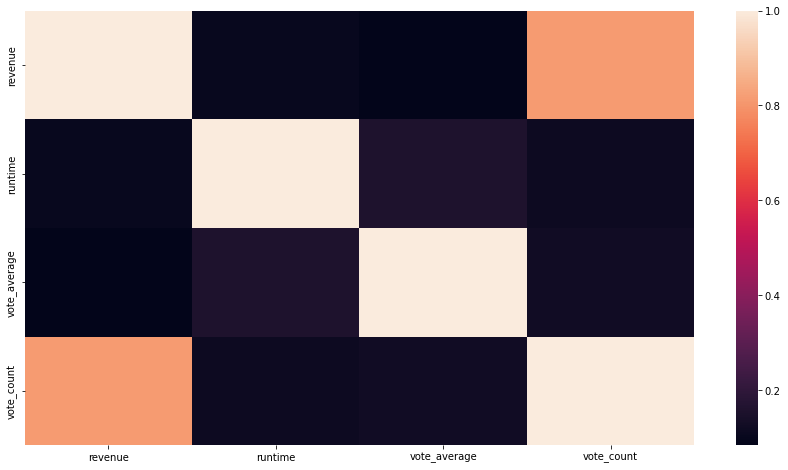

In [1623]:
plt.figure(figsize=(15,8))
sns.heatmap(df_org.corr())

In [1624]:
df_org.shape

(45466, 24)

In [1625]:
df_org.vote_count.shape

(45466,)

In [1626]:
df_org[df_org.vote_count.isnull()].shape

(6, 24)

In [1627]:
df_org[df_org.vote_average.isnull()].shape

(6, 24)

In [1628]:
#df_org.hist(figsize = (10,10));

(array([42845.,   788.,   550.,   285.,   237.,   204.,   164.,   141.,
          127.,   125.]),
 array([   0. ,  122.5,  245. ,  367.5,  490. ,  612.5,  735. ,  857.5,
         980. , 1102.5, 1225. ]),
 <BarContainer object of 10 artists>)

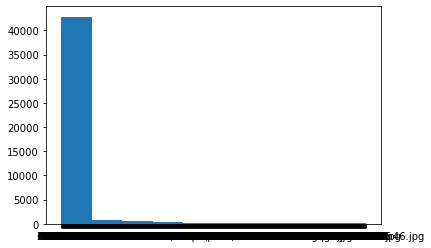

In [1629]:
plt.hist(df_org['budget'])

In [1630]:
df_org.vote_count.describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [1631]:
df_org.vote_average.describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [1632]:
df_org.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
38796,FALSE,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name': 'Horror'}]",http://www.magnetreleasing.com/theeyesofmymother/,371560,tt5225338,en,The Eyes of My Mother,"A young, lonely woman is consumed by her deepest and darkest desires after tragedy strikes her quiet country life.",7.565485,/cU67wUWRGP1jvw5tmZdg3w4hGd8.jpg,"[{'name': 'Tandem Pictures', 'id': 38956}, {'name': 'Borderline Presents', 'id': 85140}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/02/16,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'pt', 'name': 'Português'}]",Released,NaN,The Eyes of My Mother,False,6.1,93.0


In [1633]:
df = df_org.copy()

In [1634]:
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [1635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [1636]:
df.loc[df['production_companies'].isnull()].shape

(3, 24)

In [1637]:
df.loc[df['production_countries'].isnull()].shape

(3, 24)

In [1638]:
df.loc[df['budget'].isnull()].shape

(0, 24)

In [1639]:
#df.loc[df['production_companies'].isnull()]
df.loc[(df['production_companies'].isnull()) & (df['budget'].notnull())]  # Three cases only

df.loc[(df['production_companies'].isnull()) & (df['revenue'].notnull())]  #No rows


## So, you are allowed to drop all rows where production_companies is null.

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [1640]:
df.loc[df['revenue'] == 0.0].shape

(38052, 24)

In [1641]:
df.shape

(45466, 24)

In [1642]:
df.budget.describe() #change type to numeric

count     45466
unique     1226
top           0
freq      36573
Name: budget, dtype: object

In [1643]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/30/95,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/15/95,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backd

In [1644]:
df = df.loc[df['budget']!= '0']

In [1645]:
df = df.loc[df['revenue']!= '0']

In [1646]:
df = df.loc[df['revenue']!= '0.0']

In [1647]:
df.shape

(8893, 24)

In [1648]:
df.release_date.value_counts()

01/01/05    16
01/01/07    16
01/01/08    13
01/01/06    12
01/01/11    11
            ..
09/04/16     1
12/16/68     1
07/04/62     1
01/22/04     1
11/23/06     1
Name: release_date, Length: 5525, dtype: int64

In [1649]:
len(df)

8893

In [1650]:
df.budget.shape

(8893,)

In [1651]:
df.revenue.shape

(8893,)

In [1652]:
len(df) - len(df[df.belongs_to_collection.isnull()]) 

1588

In [1653]:
len(df.query('budget == "0"')) 

0

In [1654]:
len(df[df.budget.isnull()]) 

0

In [1655]:
len(df[df.budget.isnull()])+len(df.query('budget == "0"')) 

0

In [1656]:
len(df.query('revenue == "25"')) 

0

In [1657]:
df.revenue.notnull().shape

(8893,)

In [1658]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
18473,FALSE,NaN,750000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]",http://www.magnetreleasing.com/theinnkeepers/,58428,tt1594562,en,The Innkeepers,"During the final days at the Yankee Pedlar Inn, two employees determined to reveal the hotel's haunted past begin to experience disturbing events as old guests check in for a stay.",8.560726,/z8bx4DjqhjcMU6T1cU0FuZFboQ3.jpg,"[{'name': 'Glass Eye Pix', 'id': 1360}, {'name': 'Dark Sky Films', 'id': 4592}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/01/11,78396.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some guests never checked out.,The Innkeepers,False,5.4,223.0


In [1659]:
df.shape

(8893, 24)

In [1660]:
dict_list = []
for row in df['production_companies']:
    json_acceptable_string = row.replace("'", "\"")
    row = json.loads(json_acceptable_string)
    dict_list.append(row)

name_list = []  
for list_dict_list in dict_list:
    for name in list_dict_list:
        name_list.append(name.get('name'))
        
name_df = pd.DataFrame(name_list, columns=['companies'])
name_df.shape

JSONDecodeError: Expecting ',' delimiter: line 1 column 452 (char 451)

In [ ]:
df.head()

#plt.figure(figsize=(10,10))
#sns.countplot(y="genre_new", data=genre_df,color = 'cornflowerblue')
#popular_genres = genre_df['genre_new'].value_counts()
#popular_genres.plot(kind='bar', figsize=(15,10), sort_columns='True', title='Popular Genres');


#genre_df = genre_df.sort_values('genre_new')

#g = sns.countplot(data = df, y = df['genre_new'], color = 'cornflowerblue')

plt.figure(figsize = (13,13))
s = pd.Series(np.random.choice(list(genre_df['genre_new']), 1000))
counts = s.value_counts()
ax = counts.iloc[:100].plot(kind="barh")
ax.invert_yaxis()



#have directed a greater number of movies. 
#top_genres = genre_df['genre_new'].sort_values(ascending=False)
#List of top directors
#genre_df['genre_new'][:5].plot(kind='bar', figsize=(15,11), title='No. of movies directed by top 30 directors').yaxis.label.set_visible(False);

In [ ]:
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]
df[['production_companies']] = df[['production_companies']].applymap(json_to_arr)

In [ ]:
df.genres.describe()

In [1800]:
df ['production_companies'] = df ['production_companies'].astype ("string")

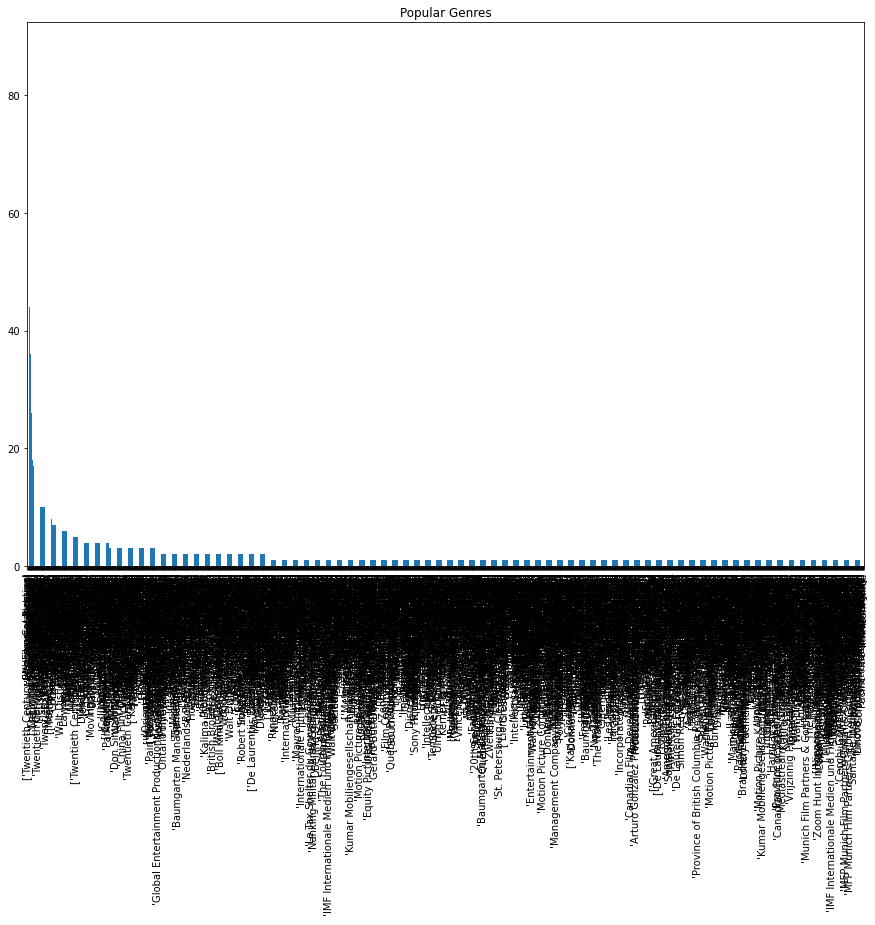

In [1801]:
df_q1 = df.copy(deep=True)
#Cleaning the dataset according to requirments and only keeping those coloumns that are actually needed.

#df_q1.drop(df_q1.columns.difference(['popularity', 'original_title','genres','release_year']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df_q1.production_companies = df_q1.production_companies.str.split(',')
#The below function explode that I have used is taken from stackoverflow. Which allows me to seperate the various movie rows according to their multiple genres. So for example if I have a movie which is of action and drama genre. This function would allow me to split the row into 2 rows each having a single genre of 'drama' and 'action'

def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]
#Dropping null values and calling the explode function
df_q1.dropna(inplace = True);
df_q1 = explode(df_q1, ['production_companies'])
# What are the most popular genres 
#Having extrated primenalry results, we can now visualize which genre had the most movies over all the years. The below code and the subsequent graph does just that.

popular_genres = df_q1['production_companies'].value_counts()
popular_genres.plot(kind='bar', figsize=(15,10), sort_columns='True', title='Popular Genres');

In [1802]:
df_q1.to_csv('movie_dataset_explode.csv', index=False)

In [ ]:
#df[['production_countries']] = df[['production_countries']].applymap(lambda row: json_to_arr(row, "iso_3166_1"))
df[['production_companies']] = df[['production_companies']].applymap(json_to_arr)

In [ ]:
df_q1.shape

In [ ]:
df.loc[df.duplicated()].shape

In [ ]:
df.head()

In [ ]:
from ast import literal_eval

df['production_countries'] = df['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])



In [1661]:
df.shape

(8893, 24)

In [1662]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1071,FALSE,NaN,1500000,"[{'id': 18, 'name': 'Drama'}]",NaN,221,tt0048545,en,Rebel Without a Cause,"After moving to a new town, troublemaking teen Jim Stark is supposed to have a clean slate, although being the new kid in town brings its own problems. While searching for some stability, Stark forms a bond with a disturbed classmate, Plato, and falls for local girl Judy. However, Judy is the girlfriend of neighborhood tough, Buzz. When Buzz violently confronts Jim and challenges him to a drag race, the new kid's real troubles begin.",10.968169,/bEAoNvtqvO0c2lItNkKlKUqhPuw.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/27/55,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The bad boy from a good family.,Rebel Without a Cause,False,7.6,351.0


In [1663]:


#df['belongs_to_collection'] = df['belongs_to_collection'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])



In [1664]:


df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [1665]:
df.shape

(8893, 24)

In [1666]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
32536,FALSE,"{'id': 427397, 'name': 'The Angrez Collection', 'poster_path': '/aGTwpTqBiqRmL3TYVm7d0lsJFJG.jpg', 'backdrop_path': '/wj8MFAYnKz0k2LcERbpnxhL5cIK.jpg'}",50000,[Comedy],http://en.wikipedia.org/wiki/The_Angrez,115873,tt2612156,hi,The Angrez,"The Angrez is a 2006 Indian comedy movie directed by Kuntaa Nikkil. In this movie, the word ""Angrez"" refers to English people and non-resident Indians. The movie was a trendsetter in that, it was one of the first to effectively and humorously, often resorting to the slapstick kind, portray the dialect of the Old City and the Hyderabadi tongue. The film also portrays the fascination for American materialism, the hype around the IT industry and the lifestyle and culture it has spawned.",0.34064,/xk3dMWJsWOClInmdORzFo7fyKx3.jpg,[],[],06/02/06,300000.0,110.0,"[اردو, हिन्दी]",Released,NaN,The Angrez,False,6.9,6.0


In [1667]:
print (type(df.loc[0, 'genres']))

<class 'list'>


In [1668]:
#df ['genres'] = df ['genres'].astype ("string")

In [1669]:
#print (type(df.loc[0, 'genres']))


In [1670]:
#df['genres'] = df['genres'].str.get(2)

In [1671]:
#genres_count = pd.Series(df['genres'].str.cat(sep = ',').split(',')).value_counts(ascending = False)
#genres_count

In [1672]:
#df2['gen1'], df2['gen2'], df2['gen3'] = zip(*df2.pop('genres'))

In [1673]:
#df = df['genres'].tolist()
#df.sample(1)

In [1674]:
#df ['genres'] = df ['genres'].astype ("string")

In [1675]:
#df_2.DataFrame(df['genre'], columns = ['c1', 'c2', 'c3'])

In [1676]:
# set an index (each column will inherit it)
#df2 = df.set_index(['genres'])
# the trick
#unnested_lst = []
#for col in df2.columns:
    #unnested_lst.append(df2[col].apply(pd.Series).stack())
#result = pd.concat(unnested_lst, axis=1, keys=df2.columns)

In [1677]:

#res_list = df['genres'].values()
#new_value = list(res_list)
#print(new_value)

In [1678]:
# We will expand genres column to multiple columns and then add them to main dataframe
#new_genres= df['genres'].str.split(",", n = 5, expand = True) 
#new_genres.head(2)

# mapping new values for expanded column names
#col_dict = {0:'genre_11', 1:'genre_22', 2:'genre_33', 3:'genre_44', 4:'genre_55'}
           
#new_genres.rename(mapper=col_dict, axis=1, inplace=True)
# adding new columns to main dataframe
#for col in new_genres.columns:
   # df[col] = new_genres[col]
#df.sample(1)

In [1679]:
# set an index (each column will inherit it)
#df2 = df.set_index(['genre_1', 'genre_2'])
# the trick
#unnested_lst = []
#for col in df2.columns:
    #unnested_lst.append(df2[col].apply(pd.Series).stack())
#result = pd.concat(unnested_lst, axis=1, keys=df2.columns)

In [1680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8893 entries, 0 to 45422
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  8893 non-null   object 
 1   belongs_to_collection  1588 non-null   object 
 2   budget                 8893 non-null   object 
 3   genres                 8893 non-null   object 
 4   homepage               2758 non-null   object 
 5   id                     8893 non-null   object 
 6   imdb_id                8891 non-null   object 
 7   original_language      8893 non-null   object 
 8   original_title         8893 non-null   object 
 9   overview               8846 non-null   object 
 10  popularity             8891 non-null   object 
 11  poster_path            8886 non-null   object 
 12  production_companies   8893 non-null   object 
 13  production_countries   8893 non-null   object 
 14  release_date           8889 non-null   object 
 15  rev

In [1681]:


df['release_date'] = pd.to_datetime(df['release_date'])
#pd.to_datetime(df['year'], errors="ignore")
df.loc[df['release_date'].dt.year >= 2018, 'release_date'] -= pd.DateOffset(years=100)
#same like

df['year'] = df['release_date'].dt.strftime("%Y")
#df.sample()

In [1682]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
13236,FALSE,NaN,1500000,[Drama],http://www.benx.be/,6936,tt0953318,nl,Ben X,"Harassed by bullies because of his mild autism, teen Ben (Greg Timmermans) finds refuge in an online computer game, which leads him to his virtual dream girl, Scarlite (Laura Verlinden). Together, the odd couple seeks revenge against Ben's tormentors. Director Nic Balthazar's beguiling mix of kitchen-sink drama and full-blown fantasy was Belgium's Oscar submission for Best Foreign Language Film.",3.873511,/4EYFjfvNb6ohZjuI9yAW8ZMqWPE.jpg,"[{'name': 'MMG Film & TV Production', 'id': 2075}]","[{'iso_3166_1': 'BE', 'name': 'Belgium'}]",2007-08-26,0.0,90.0,[Nederlands],Released,Everything's dare,Ben X,False,7.0,90.0,2007


In [1683]:
df = df.loc[df['production_companies'].notnull()]

In [1684]:
df = df.loc[df['production_countries'].notnull()]

In [1685]:
df = df.loc[df['production_companies']!= 'FALSE']

In [1686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8890 entries, 0 to 45422
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  8890 non-null   object        
 1   belongs_to_collection  1585 non-null   object        
 2   budget                 8890 non-null   object        
 3   genres                 8890 non-null   object        
 4   homepage               2755 non-null   object        
 5   id                     8890 non-null   object        
 6   imdb_id                8888 non-null   object        
 7   original_language      8890 non-null   object        
 8   original_title         8890 non-null   object        
 9   overview               8843 non-null   object        
 10  popularity             8890 non-null   object        
 11  poster_path            8883 non-null   object        
 12  production_companies   8890 non-null   object        
 13  pr

In [1687]:
df.shape

(8890, 25)

In [1688]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [1689]:
df ['production_companies'] = df ['production_companies'].astype ("string")
df ['spoken_languages'] = df ['spoken_languages'].astype ("string")
#production_countries
df ['production_countries'] = df ['production_countries'].astype ("string")

In [1690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8890 entries, 0 to 45422
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  8890 non-null   object        
 1   belongs_to_collection  1585 non-null   object        
 2   budget                 8890 non-null   object        
 3   genres                 8890 non-null   object        
 4   homepage               2755 non-null   object        
 5   id                     8890 non-null   object        
 6   imdb_id                8888 non-null   object        
 7   original_language      8890 non-null   object        
 8   original_title         8890 non-null   object        
 9   overview               8843 non-null   object        
 10  popularity             8890 non-null   object        
 11  poster_path            8883 non-null   object        
 12  production_companies   8890 non-null   string        
 13  pr

In [1691]:

#df = df.loc[df["spoe"] != '[]']

In [1692]:
df_q1 = df.copy(deep=True)

C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2368 missing from current font.

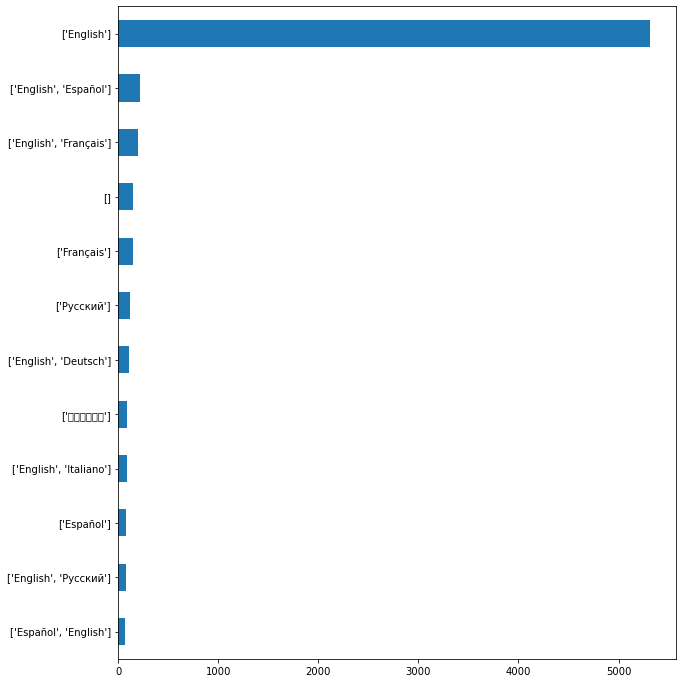

In [1693]:
df_q1.spoken_languages = df_q1.production_countries.str.split(',')
#The below function explode that I have used is taken from stackoverflow. Which allows me to seperate the various movie rows according to their multiple genres. So for example if I have a movie which is of action and drama genre. This function would allow me to split the row into 2 rows each having a single genre of 'drama' and 'action'

def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]
#Dropping null values and calling the explode function
df_q1.dropna(inplace = True);
df_q1 = explode(df_q1, ['spoken_languages'])
# What are the most popular genres 
#Having extrated primenalry results, we can now visualize which genre had the most movies over all the years. The below code and the subsequent graph does just that.
#df_q1 = df_q1.sort_values('production_companies')

#popular_genres = df_q1['production_companies'].value_counts()
#popular_genres.plot(kind='barh', figsize=(15,20), sort_columns='True', title='Popular Co.s');




#df = df.sort_values('genre_new')
#g = sns.countplot(data = df, y = df['genre_new'], color = 'cornflowerblue')

plt.figure(figsize = (10,12))
#s = pd.Series(np.random.choice(list(df_q1['production_companies']), 1000))
counts = df['spoken_languages'].value_counts()
ax = counts.iloc[:12].plot(kind="barh")
ax.invert_yaxis()



In [1694]:
df.shape

(8890, 25)

In [1695]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

TypeError: string indices must be integers

In [1696]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
3607,FALSE,"{'id': 495, 'name': 'Shaft Collection', 'poster_path': '/z6UFfaPSYIEMZGxiNGuy881hcsH.jpg', 'backdrop_path': '/muZrPdBs937VAx03Giw66x1XGus.jpg'}",4000000,"[Adventure, Action, Thriller, Crime]",NaN,482,tt0067741,en,Shaft,Cool black private eye John Shaft is hired by a crime lord to find and retrieve his kidnapped daughter.,3.73688,/ez5aGeyOvG2F1QzKYHzkMmkDuM2.jpg,"['Metro-Goldwyn-Mayer (MGM)', 'Shaft Productions Ltd.']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1971-07-02,12121618.0,100.0,['English'],Released,The mob wanted Harlem back. They got shaft...up to here.,Shaft,False,6.5,68.0,1971


In [1697]:
df.shape

(8890, 25)

In [1698]:
df_copy = df.copy()

In [1699]:
df_copy.shape

(8890, 25)

In [1700]:
df.spoken_languages.describe()

count            8890
unique            855
top       ['English']
freq             5309
Name: spoken_languages, dtype: object

In [1701]:
print (type(df.loc[0, 'production_companies']))

<class 'str'>


C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2368 missing from current font.

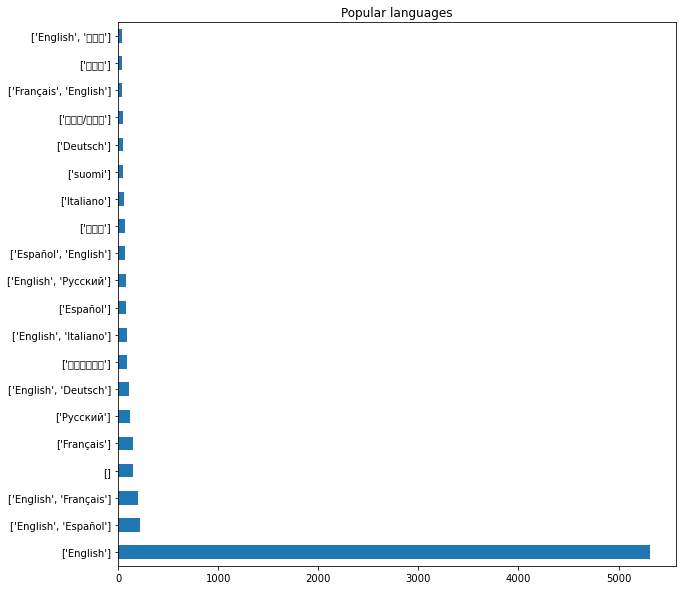

In [1702]:


popular_companies = df_copy['spoken_languages'].value_counts()
popular_companies[:20].plot(kind='barh', figsize=(10,10), sort_columns='True', title='Popular languages')
plt.xticks(rotation=0);

In [1703]:
df.shape

(8890, 25)

In [1704]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
744,FALSE,NaN,50000000,"[Drama, Thriller, Crime]",NaN,9879,tt0117765,en,Striptease,"Bounced from her job, Erin Grant needs money if she's to have any chance of winning back custody of her child. But, eventually, she must confront the naked truth: to take on the system, she'll have to take it all off. Erin strips to conquer, but she faces unintended circumstances when a hound dog of a Congressman zeroes in on her and sharpens the shady tools at his fingertips, including blackmail and murder.",11.341502,/9ghJrXb6ja0yz5ITSsBHx64RLlX.jpg,"['Columbia Pictures', 'Castle Rock Entertainment']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1996-06-28,113309743.0,115.0,['English'],Released,Some People Get Into Trouble No Matter What They WEAR.,Striptease,False,4.4,210.0,1996


plt.figure(figsize=(10,10))
sns.countplot(y="production_companies", data=df, color = 'cornflowerblue')



# Drop all null values. 
df_q2 = df_q2.dropna()
# Sieve through the dataset by using a group by function and find out the list of directors which produced the most
# movies in descending order. Since the number of directors in this dataset is huge, we shall only consider the top few who 
#have directed a greater number of movies. 
top_actors = (df_q2.groupby('director')['original_title'].count()).sort_values(ascending=False)
#List of top directors
top_actors[:30].plot(kind='bar', figsize=(15,11), title='No. of movies directed by top 30 directors').yaxis.label.set_visible(False);

In [1705]:
df.shape

(8890, 25)

In [1706]:
df.belongs_to_collection.notnull().shape

(8890,)

In [1707]:
from ast import literal_eval

#df['production_countries'] = df['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#df['production_companies'] = df['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#df['belongs_to_collection'] = df['belongs_to_collection'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [1708]:
#df[['production_countries']] = df[['production_countries']].applymap(lambda row: json_to_arr(row, "iso_3166_1"))
#df[['production_companies']] = df[['production_companies']].applymap(json_to_arr)

In [1709]:

#df[['production_countries']] = df[['production_countries']].applymap(lambda row: json_to_arr(row, "iso_3166_1"))
#df[['production_companies']] = df[['production_companies']].applymap(json_to_arr)

In [1710]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
26739,FALSE,NaN,2763806,"[Drama, Foreign]",NaN,43432,tt0383862,es,Roma,"Joaquín Góñez, a novelist in his sixties recalls his emotions, his wild years in Buenos Aires, the memories of old friends, the meaning of loyalty and the intimate relationship with his mother, Roma.",0.420613,/ap99aZPCkTqwguKsy3y6QVXyKeg.jpg,"['Aristarain P.C.', 'Estudios Flomenbaun Abogados']","[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_3166_1': 'AR', 'name': 'Argentina'}]",2004-04-15,0.0,148.0,['Español'],Released,NaN,Roma,False,6.0,4.0,2004


In [1711]:
df.belongs_to_collection.isnull().shape

(8890,)

In [1712]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
3412,FALSE,NaN,43000000,"[Comedy, Drama]",NaN,10468,tt0191754,en,28 Days,"After getting into a car accident while drunk on the day of her sister's wedding, Gwen Cummings is given a choice between prison or a rehab center. She chooses rehab, but is extremely resistant to taking part in any of the treatment programs they have to offer, refusing to admit that she has an alcohol addiction.",4.756669,/qTrrElHcONoix4hb4IpLiqEnjlb.jpg,['Columbia Pictures'],"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2000-04-06,0.0,103.0,['English'],Released,The Life of the Party... before she got a life.,28 Days,False,6.0,210.0,2000


In [1713]:
#df['belongs_to_collection'] = df['belongs_to_collection'].fillna('no')
#df['belongs_to_collection'] = df['belongs_to_collection'].fillna('No')


In [1714]:
df.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
26849,FALSE,NaN,47000,[Horror],NaN,27832,tt0068414,en,The Corpse Grinders,"When the Lotus Cat Food Company finds itself in financial trouble, the owners decide to find a new, cheap source of meat -- the local graveyard. Only one problem -- soon cats develop a taste for human flesh, and tabbies are tearing out throats all over town.",0.783754,/53bH0uFQzGzyyeIBB9UgQWTwRDS.jpg,"['CG Productions', 'T.V. Mikels Film Corporation']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1971-05-19,0.0,72.0,['English'],Released,They Went in People and Came Out Hamburger!,The Corpse Grinders,False,3.8,6.0,1971


In [1715]:
#df['belongs_to_collection'] = df['belongs_to_collection'].replace(['NaN'],'NO')
df.belongs_to_collection.isnull().shape

(8890,)

In [1716]:
df.status.value_counts()

Released           8865
Post Production      12
Rumored              10
Name: status, dtype: int64

In [1717]:
df.query('adult == "True"')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year


In [1718]:
# Columns that needs to be deleted
deleted_columns = [ 'id', 'imdb_id','original_language','original_title', 'homepage','poster_path', 'tagline', 'overview','adult', 'status', 'video']
# Drop the columns from the database
df.drop(deleted_columns, axis=1, inplace=True)
# Lets look at the new dataset
df.head()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[Animation, Comedy, Family]",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,['English'],Toy Story,7.7,5415.0,1995
1,NaN,65000000,"[Adventure, Fantasy, Family]",17.015539,"['TriStar Pictures', 'Teitler Film', 'Interscope Communications']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,1995
3,NaN,16000000,"[Comedy, Drama, Romance]",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,81452156.0,127.0,['English'],Waiting to Exhale,6.1,34.0,1995
5,NaN,60000000,"[Action, Crime, Drama, Thriller]",17.924927,"['Regency Enterprises', 'Forward Pass', 'Warner Bros.']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,187436818.0,170.0,"['English', 'Español']",Heat,7.7,1886.0,1995
6,NaN,58000000,"[Comedy, Romance]",6.677277,"['Paramount Pictures', 'Scott Rudin Productions', 'Mirage Enterprises', 'Sandollar Productions', 'Constellation Entertainment', 'Worldwide', 'Mont Blanc Entertainment GmbH']","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,0.0,127.0,"['Français', 'English']",Sabrina,6.2,141.0,1995


In [1719]:
df.shape

(8890, 14)

In [1720]:
#df.plot.hist(column=["production_companies"], figsize=(10, 8))

In [1721]:
#df.production_companies.value_counts()

#plt.hist(df['production_companies'])

In [1722]:
df.dtypes

belongs_to_collection            object
budget                           object
genres                           object
popularity                       object
production_companies             string
production_countries             string
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 string
title                            object
vote_average                    float64
vote_count                      float64
year                             object
dtype: object

In [1723]:
#df ['revenue'] = df ['revenue'].replace (0, np.NaN) 

In [1724]:
df.budget.value_counts()

5000000     286
10000000    259
20000000    243
2000000     242
15000000    226
           ... 
9750000       1
7275000       1
78146652      1
280           1
1254040       1
Name: budget, Length: 1222, dtype: int64

In [1725]:
#df ['budget'] = df ['budget'].replace (0, np.NaN) 

In [1726]:
#df = df.loc[df['budget'] > 4999]

In [1727]:
df= df.loc[df['budget'] != 0]
df = df.loc[df['revenue'] != 0]


In [1728]:
df.budget.value_counts()

20000000    184
25000000    175
15000000    172
30000000    157
10000000    147
           ... 
886000        1
864000        1
64000         1
17010000      1
2196531       1
Name: budget, Length: 704, dtype: int64

In [1729]:
df.revenue.value_counts()

12000000.0     16
11000000.0     15
2000000.0      15
10000000.0     15
500000.0       12
               ..
37664855.0      1
12918858.0      1
181001478.0     1
43061982.0      1
1413000.0       1
Name: revenue, Length: 5008, dtype: int64

In [1730]:
df = df.loc[df['production_companies'] != '[]']

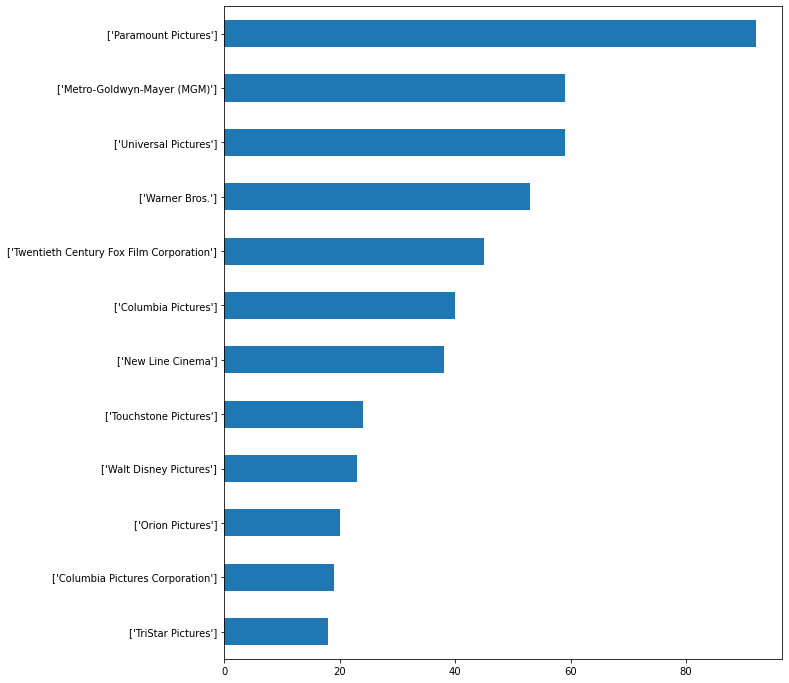

In [1731]:
df_q1.production_companies = df_q1.production_companies.str.split(',')
#The below function explode that I have used is taken from stackoverflow. Which allows me to seperate the various movie rows according to their multiple genres. So for example if I have a movie which is of action and drama genre. This function would allow me to split the row into 2 rows each having a single genre of 'drama' and 'action'

def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]
#Dropping null values and calling the explode function
df_q1.dropna(inplace = True);
df_q1 = explode(df_q1, ['production_companies'])
# What are the most popular genres 
#Having extrated primenalry results, we can now visualize which genre had the most movies over all the years. The below code and the subsequent graph does just that.
#df_q1 = df_q1.sort_values('production_companies')

#popular_genres = df_q1['production_companies'].value_counts()
#popular_genres.plot(kind='barh', figsize=(15,20), sort_columns='True', title='Popular Co.s');




#df = df.sort_values('genre_new')
#g = sns.countplot(data = df, y = df['genre_new'], color = 'cornflowerblue')

plt.figure(figsize = (10,12))
#s = pd.Series(np.random.choice(list(df_q1['production_companies']), 1000))
counts = df['production_companies'].value_counts()
ax = counts.iloc[:12].plot(kind="barh")
ax.invert_yaxis()



In [1732]:
df_q1.shape

(5353, 25)

In [1733]:
df_q1.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
350,FALSE,"{'id': 64750, 'name': 'Blair Witch Collection', 'poster_path': '/qDQuKJZYLHrs1Ej64tYYFooFxc1.jpg', 'backdrop_path': '/e5GwLq0zBer3SuSJZodcNROnT6Z.jpg'}",60000,"[Horror, Mystery]",http://www.blairwitch.com/,2667,tt0185937,en,The Blair Witch Project,"In October of 1994 three student filmmakers disappeared in the woods near Burkittsville, Maryland, while shooting a documentary. A year later their footage was found.",14.838386,/ip2IqmvCqFzvPe8RAHpT1My6XM9.jpg,['Artisan Entertainment',"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1999-07-14,248000000.0,81.0,[{'iso_3166_1': 'US',Released,The scariest movie of all time is a true story.,The Blair Witch Project,False,6.3,1090.0,1999


In [1734]:
df_q1.plot(x="production_companies", y=["top10_mark", "bottom90_mark"], kind="bar")

KeyError: "None of [Index(['top10_mark', 'bottom90_mark'], dtype='object')] are in the [columns]"

In [1735]:
df.loc[df['genres'].isnull()]

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year


In [1736]:
df.release_date.isnull().shape

(5200,)

In [1737]:
#df = df.loc[df['release_date'].notnull()]


In [1738]:
df.shape

(5200, 14)

In [1739]:
df.dtypes

belongs_to_collection            object
budget                           object
genres                           object
popularity                       object
production_companies             string
production_countries             string
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 string
title                            object
vote_average                    float64
vote_count                      float64
year                             object
dtype: object

In [1740]:
df.budget.describe()


count         5200
unique         678
top       20000000
freq           183
Name: budget, dtype: object

In [1741]:
df['budget'] = pd.to_numeric(df['budget'],errors = 'coerce')

In [1742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 45412
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1208 non-null   object        
 1   budget                 5200 non-null   int64         
 2   genres                 5200 non-null   object        
 3   popularity             5200 non-null   object        
 4   production_companies   5200 non-null   string        
 5   production_countries   5200 non-null   string        
 6   release_date           5200 non-null   datetime64[ns]
 7   revenue                5200 non-null   float64       
 8   runtime                5200 non-null   float64       
 9   spoken_languages       5200 non-null   string        
 10  title                  5200 non-null   object        
 11  vote_average           5200 non-null   float64       
 12  vote_count             5200 non-null   float64       
 13  ye

(array([3.797e+03, 8.420e+02, 2.800e+02, 1.590e+02, 6.400e+01, 3.500e+01,
        1.900e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 3.80000009e+07, 7.60000008e+07, 1.14000001e+08,
        1.52000001e+08, 1.90000000e+08, 2.28000000e+08, 2.66000000e+08,
        3.04000000e+08, 3.42000000e+08, 3.80000000e+08]),
 <BarContainer object of 10 artists>)

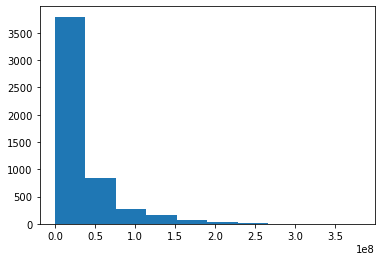

In [1743]:
plt.hist(df['budget'])

In [1744]:
#plt.figure(figsize=(12,10))
#sns.regplot(data = df, x = 'budget', y = 'profit_diff', scatter_kws = {'alpha':0.1}, )
#matplotlib.pyplot.ylim(-7, 10)
#plt.ylabel('Profit')
#plt.xlabel('Budget')

#yabs_max = abs(max(ax.get_ylim(), key=abs))
#ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)

#scale_x_continuous(expand = c(0, 0), limits = c(0, NA)) + scale_y_continuous(expand = c(0, 0), limits = c(0, NA))
#matplotlib.pyplot.ylim(0,62)
#matplotlib.pyplot.ylim(0, max(2.5))

In [1745]:
#plt.figure(figsize=(12,10))
#sns.regplot(data = df, y = 'budget', x = 'year', scatter_kws = {'alpha':0.1}, )
#matplotlib.pyplot.ylim(-7, 10)
#plt.ylabel('Profit')
#plt.xlabel('Budget')

In [1746]:
#df.genres.value_counts()

In [1747]:
df.sample()


,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
893,NaN,4000000,"[Drama, Romance, War]",14.240357,"['Selznick International Pictures', 'Metro-Goldwyn-Mayer (MGM)']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1939-12-15,400176459.0,238.0,['English'],Gone with the Wind,7.7,995.0,1939


In [1748]:
#df ['genres'] = df ['genres'].astype ("string")
#df.head(3)

In [1749]:
#res_list = df['genres'].values()
#new_value = list(res_list)
#print(new_value)

In [1750]:
df.budget.describe()


count    5.200000e+03
mean     3.204126e+07
std      4.051798e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.800000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [1751]:
#df.sample(2)

In [1752]:
#df['until_this_date'] = '01-07-2017'

In [1753]:
df.budget.value_counts()

20000000    183
25000000    175
15000000    169
30000000    157
40000000    145
           ... 
5952000       1
4361898       1
9250000       1
658000        1
2196531       1
Name: budget, Length: 678, dtype: int64

In [1754]:
#df ['until_this_date'] = df ['until_this_date'].astype ('datetime64')
#df.
df ['release_date'] = df ['release_date'].astype ('datetime64')

In [1755]:
pd.to_datetime(df['release_date'], errors="ignore")

0       1995-10-30
1       1995-12-15
3       1995-12-22
5       1995-12-15
8       1995-12-22
           ...    
45139   2017-07-28
45167   2017-08-03
45250   2007-06-14
45399   2014-06-05
45412   2010-09-30
Name: release_date, Length: 5200, dtype: datetime64[ns]

In [1756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 45412
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1208 non-null   object        
 1   budget                 5200 non-null   int64         
 2   genres                 5200 non-null   object        
 3   popularity             5200 non-null   object        
 4   production_companies   5200 non-null   string        
 5   production_countries   5200 non-null   string        
 6   release_date           5200 non-null   datetime64[ns]
 7   revenue                5200 non-null   float64       
 8   runtime                5200 non-null   float64       
 9   spoken_languages       5200 non-null   string        
 10  title                  5200 non-null   object        
 11  vote_average           5200 non-null   float64       
 12  vote_count             5200 non-null   float64       
 13  ye

In [1757]:
#df['diff_years'] = (df['until_this_date'] - df['release_date']) / np.timedelta64(1, 'Y')

In [1758]:
df.sample()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
16161,NaN,7000000,[Comedy],3.18614,"['Wild Bunch', 'Likely Story', 'Tax Credit Finance', '3 Arts Entertainment']","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",2010-08-01,453079.0,108.0,['English'],The Extra Man,5.9,29.0,2010


In [1759]:
#df.info()

In [1760]:
df['budget'] = pd.to_numeric(df['budget'],errors = 'coerce')

In [1761]:
#df['profit_in_year'] = (df['revenue']/df['budget'])*100/df['diff_years']

In [1762]:
#df['profit_div'] = (df['revenue']/df['budget'])*100

In [1763]:
#df['profit_div_no100'] = (df['revenue']/df['budget'])

In [1764]:
df['profit_diff'] = (df['revenue']-df['budget'])

In [1765]:
df.sample()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff
41005,NaN,10000000,"[Action, Adventure, Science Fiction]",6.703892,"['Ingenious Media', 'Mattel Entertainment', 'Dolphin Entertainment']","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",2016-10-14,6272403.0,92.0,['English'],Max Steel,5.1,234.0,2016,-3727597.0


In [1766]:
df.shape

(5200, 15)

In [1767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 45412
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1208 non-null   object        
 1   budget                 5200 non-null   int64         
 2   genres                 5200 non-null   object        
 3   popularity             5200 non-null   object        
 4   production_companies   5200 non-null   string        
 5   production_countries   5200 non-null   string        
 6   release_date           5200 non-null   datetime64[ns]
 7   revenue                5200 non-null   float64       
 8   runtime                5200 non-null   float64       
 9   spoken_languages       5200 non-null   string        
 10  title                  5200 non-null   object        
 11  vote_average           5200 non-null   float64       
 12  vote_count             5200 non-null   float64       
 13  ye

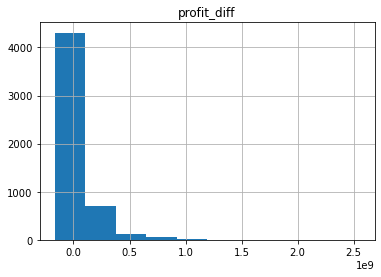

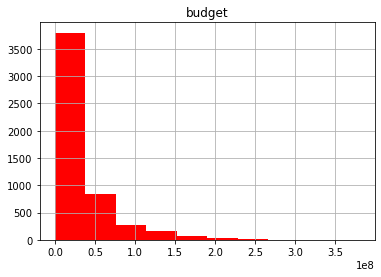

In [1768]:
p2=pd.DataFrame.hist(data=df, column='profit_diff')
p2=pd.DataFrame.hist(data=df, column='budget', color = 'red')
#matplotlib.pyplot.xlim(-0.5, 10)


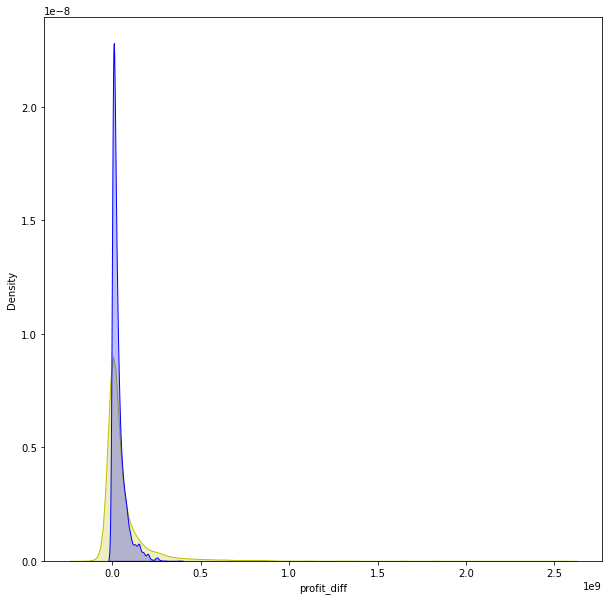

In [1769]:
plt.figure(figsize=(10,10))
p1=sns.kdeplot(df['profit_diff'], shade=True, color="y")
p1=sns.kdeplot(df['budget'], shade=True, color="b")
#p1=sns.kdeplot(df['revenue'], shade=True, color="g")
#matplotlib.pyplot.xlim(-0.1, 0.0012)

In [1770]:
#df.info()

In [1771]:
df['vote_count'] = pd.to_numeric(df['vote_count'],errors = 'coerce')
#df['top_counts'] = (df['vote_count'] > df['vote_count'].quantile(0.10)).astype(int)
#df.loc[df['top_counts'] == '1']

In [1772]:
#df['bottom_counts'] = (df['vote_count'] < df['vote_count'].quantile(0.10)).astype(int)

In [1773]:
df.drop

<bound method DataFrame.drop of                                                                                                                                        belongs_to_collection  \
0      {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}   
1                                                                                                                                                        NaN   
3                                                                                                                                                        NaN   
5                                                                                                                                                        NaN   
8                                                                                                                                                        NaN   
...     

In [1774]:
#df.drop('top_counts', axis=1, inplace=True)

In [1775]:
df.sample()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff
12300,NaN,30000000,"[Comedy, Romance]",10.342202,"['Spyglass Entertainment', 'Fox 2000 Pictures', 'Dune Entertainment III']","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2008-01-10,160259319.0,111.0,['English'],27 Dresses,6.1,1013.0,2008,130259319.0


In [1776]:
#df['top10_mark'] = (df['profit_diff'] > df['profit_diff'].quantile(0.90)).astype(int)

In [1777]:
#df['bottom90_mark'] = (df['profit_diff'] < df['profit_diff'].quantile(0.90)).astype(int)

In [1778]:
df.top10_mark.value_counts()

AttributeError: 'DataFrame' object has no attribute 'top10_mark'

In [1779]:
df['top10_mark'] = (df['profit_diff'] > df['profit_diff'].quantile(0.90)).astype(int)

In [1780]:
df['bottom90_mark'] = (df['profit_diff'] < df['profit_diff'].quantile(0.90)).astype(int)

In [1781]:
df.top10_mark.value_counts()

0    4680
1     520
Name: top10_mark, dtype: int64

In [1782]:
df_q1.loc[df_q1['top10_mark']==1]

KeyError: 'top10_mark'

<AxesSubplot:xlabel='count', ylabel='production_companies'>

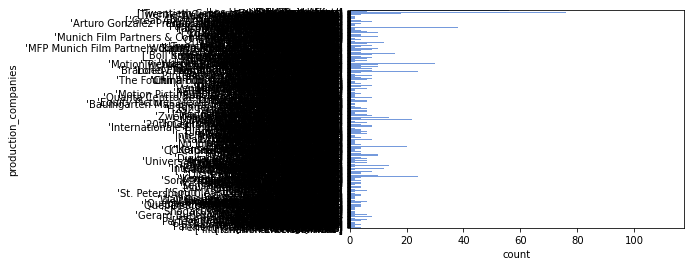

In [1783]:

sns.countplot(data = df_q1, y = df_q1['production_companies'], color = 'cornflowerblue')

In [1784]:
#using sort 
sort_comp = df['production_companies'].sort_values(ascending = False)
sort_comp.head()

43628                                                                                                                                  ['Фокс']
45399                                                                                               ['Кинокомпания «Lunapark»', 'Инвада фильм']
42599                                                                                                                                ['Вольга']
17481    ['Österreichischer Rundfunk (ORF)', 'Westdeutscher Rundfunk (WDR)', 'Filmverlag der Autoren', 'Wim Wenders Stiftung', 'Telefilm Wien']
41479                                                                                ['logan films', 'Real Bean Entertainment', 'Avilon Audio']
Name: production_companies, dtype: string

In [1785]:
df.sample()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff,top10_mark,bottom90_mark
324,"{'id': 115570, 'name': 'Star Trek: The Next Generation Collection', 'poster_path': '/sddV6vaUC6x37icJS3opIXTXB07.jpg', 'backdrop_path': '/r7MMQenUURHhAVHFymtOb8AX4Bm.jpg'}",38000000,"[Science Fiction, Action, Adventure, Thriller]",8.105708,['Paramount Pictures'],"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1994-11-17,120000000.0,118.0,['English'],Star Trek: Generations,6.4,461.0,1994,82000000.0,0,1


df = df[df[0] != 'Carousel Productions']
df=df[df[0] != 'Vision View Entertainment']
df=df[df[0] != 'Telescene Film Group Productions']
df=df[df[0] != 'Aniplex']
df=df[df[0] != 'GoHands']
df=df[df[0] != 'BROSTA TV']
df=df[df[0] != 'Mardock Scramble Production Committee']
df=df[df[0] != 'Sentai Filmworks']
df=df[df[0] != 'Odyssey Media']

df=df[df[0] != 'Pulser Productions']
df=df[df[0] != 'Rogue State']
df=df[df[0] != 'The Cartel']

In [1786]:
dict_list = []
for row in df['production_companies']:
    json_acceptable_string = row.replace(",", "\"")
    row = json.loads(json_acceptable_string)
    dict_list.append(row)

name_list = []  
for list_dict_list in dict_list:
    for name in list_dict_list:
        name_list.append(name.get('name'))
        
name_df = pd.DataFrame(name_list, columns=['companies'])
name_df.shape

JSONDecodeError: Expecting value: line 1 column 2 (char 1)

In [ ]:
#df = df.sort_values('genre_new')
#g = sns.countplot(data = df, y = df['genre_new'], color = 'cornflowerblue')

#plt.figure(figsize = (10,10))
#s = pd.Series(np.random.choice(list(df['genre']), 1000))
#counts = s.value_counts()
#ax = counts.iloc[:100].plot(kind="barh")
#ax.invert_yaxis()

In [ ]:
df.shape

In [ ]:
df.loc[df['vote_count']==0]

In [ ]:
df11=df.loc[df['top10_mark']!=1]

In [ ]:
df11.runtime.describe()

In [ ]:
#df.top_counts.value_counts()
df = df

In [ ]:
#now to plot
df['runtime'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('runtime')
plt.ylabel('number of movies');
plt.title('runtime frequency distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
#now to plot
df = df.loc[df['budget'] > 1000]
df['budget'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('budget')
plt.ylabel('number of movies');
plt.title('budget distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
#now to plot
df['revenue'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('revenue')
plt.ylabel('number of movies');
plt.title('revenue distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
#now to plot
df['profit_diff'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('profit')
plt.ylabel('number of movies');
plt.title('profit distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
#now to plot
df['vote_count'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('vote counts')
plt.ylabel('number of movies');
plt.title('vote count distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
#now to plot
df['vote_average'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('vote score')
plt.ylabel('number of movies');
plt.title('vote score distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
#now to plot
df['popularity'] = pd.to_numeric(df['popularity'],errors = 'coerce')
df['popularity'].hist(figsize = (15,13), color = 'b', alpha = 0.6, grid=False);
plt.xlabel('popularity')
plt.ylabel('number of movies');
plt.title('popularit distribution')
#matplotlib.pyplot.xlim(0.1, 300)

In [ ]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna(0)

In [1788]:
df.shape

(5200, 17)

plt.figure(figsize=(20,10))
sns.countplot(x="genre", data=df, color = 'cornflowerblue')

In [1789]:
#df.loc[df['spoken_languages'] == '[]']


In [1799]:
#df = df.sort_values('year')
#plt.figure(figsize=(10,12))
#sns.boxplot(data = df, x = 'title', y = 'profit_diff');

In [1791]:

#df = df.loc[df['release_date'].dt.year >= 2018, 'release_date'] -= pd.DateOffset(years=100)
#same like

#df['year'] = df['release_date'].dt.strftime("%Y")
#df.sample()

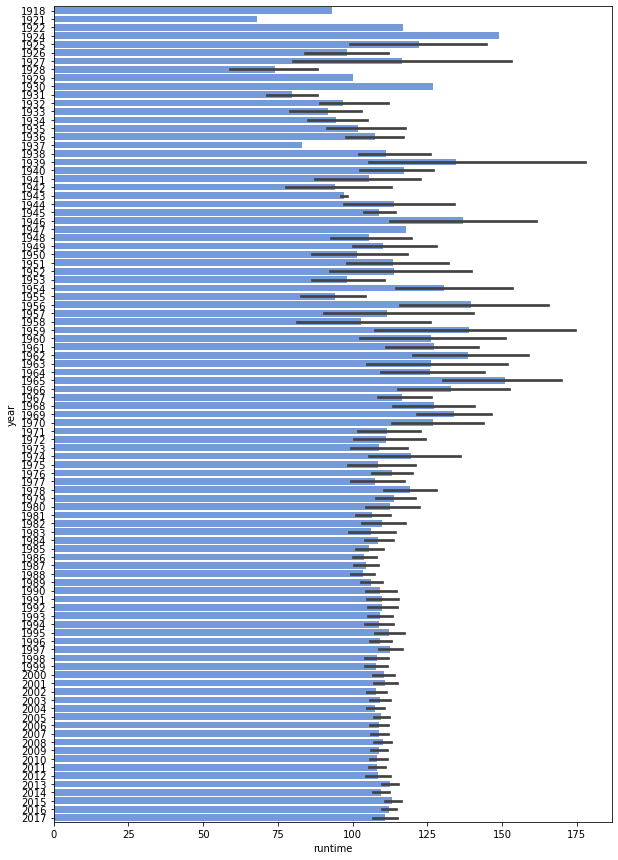

In [1792]:


plt.figure(figsize=(10,15))
df = df.sort_values('year')
sns.barplot(data = df, y = 'year', x = 'runtime', color = 'cornflowerblue');

In [1793]:
#df['year'] = df['year'].replace(['2060'],'1960')

In [1794]:
# Done in Excel
#now to plot
#df ['year'] = df ['year'].astype ('datetime64')
df = df.sort_values('year')

#df['year'].hist(figsize = (15,8), color = 'green');
#plt.xlabel('year')
#plt.ylabel('number of movies');
#plt.title('year frequency distribution')
#matplotlib.pyplot.xlim(10, 25)
#plt.xticks(rotation='vertical')


#bins=range(min(commutes), max(commutes) + binwidth, binwidth)

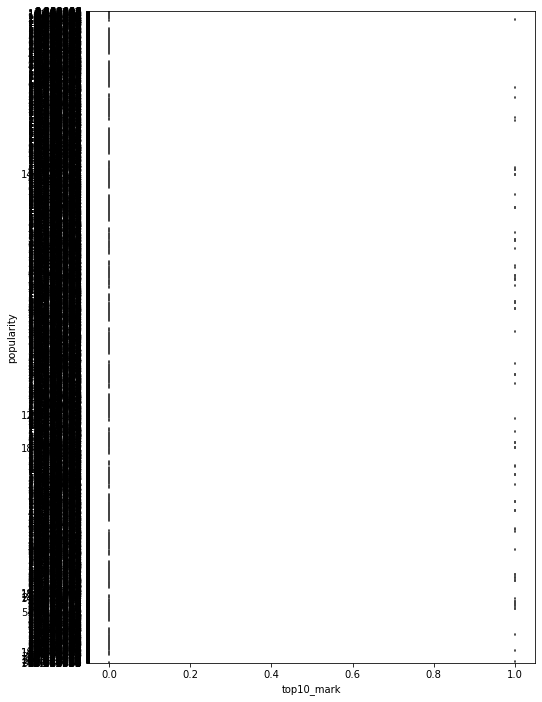

In [1795]:
#plt.figure(figsize = (10,13))
#plt.subplot(111)
# graph the distribution of math performance according to gender
#sns.catplot(data = df, x = 'top10_mark', y = 'runtime', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);
#plt.subplot(132)
# graph the distribution of reading performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

#plt.figure(figsize=(8,12))
#sns.boxplot(data = df, x = 'top10_mark', y = 'popularity');expo

In [1796]:
df.shape

(5200, 17)

In [1797]:
df69 = df.loc[df['top10_mark']==1]
df69.popularity.describe()

count     520.000000
unique    520.000000
top        16.263878
freq        1.000000
Name: popularity, dtype: float64

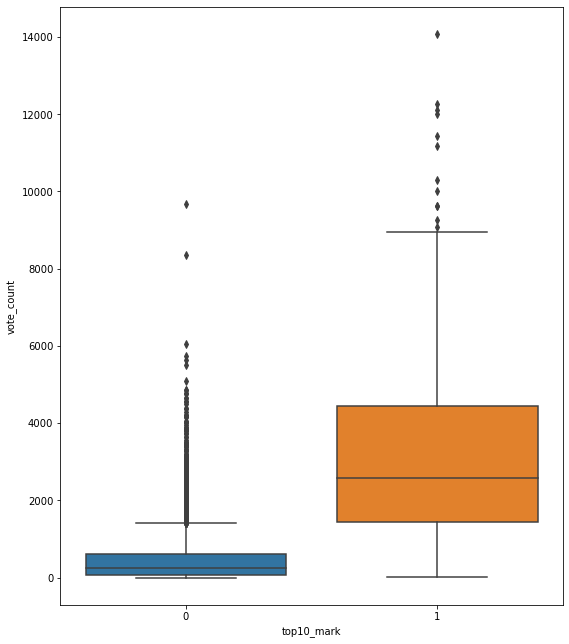

In [1798]:
#sns.catplot(data = df, x = 'top10_mark', y = 'vote_average', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);
plt.figure(figsize=(9,11))
sns.boxplot(data = df, x = 'top10_mark', y = 'vote_count');

In [1161]:
df110=df.loc[df['top10_mark']!=1]
df110.vote_count.describe()

count    4680.000000
mean      491.200641
std       697.161730
min         0.000000
25%        77.000000
50%       241.000000
75%       608.250000
max      9678.000000
Name: vote_count, dtype: float64

In [909]:
df.top10_mark.value_counts()

0    4638
1     520
Name: top10_mark, dtype: int64

In [910]:
df.budget.value_counts()

20000000    183
25000000    175
15000000    169
30000000    157
10000000    145
           ... 
609000        1
1152000       1
864000        1
886000        1
916000        1
Name: budget, Length: 652, dtype: int64

Text(0.5, 6.79999999999999, 'Bottom 90% Movies                                                                Top 10% Movies ')

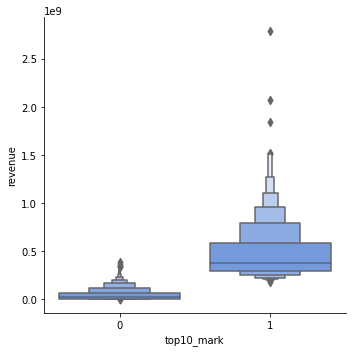

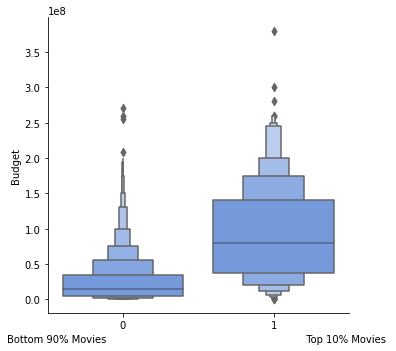

In [1134]:
#plt.figure(figsize=(15,15))
#plt.subplot(111)
sns.catplot(data = df, x = 'top10_mark', y = 'revenue', kind = 'boxen', color = 'cornflowerblue', height=5, aspect=1);


sns.catplot(data = df, x = 'top10_mark', y = 'budget', kind = 'boxen', color = 'cornflowerblue', height=5, aspect=1);
plt.ylabel('Budget')
plt.xlabel('Bottom 90% Movies                                                                Top 10% Movies ')


#sns.catplot(data = df_1, x = 'genres', y = 'budget', kind = 'boxen', color = 'cornflowerblue', height=9, aspect=1);

#sns.catplot(data = df_1, x = 'genres', y = 'revenue', kind = 'boxen', color = 'cornflowerblue', height=9, aspect=1);

In [1620]:
plt.figure(figsize = (14,13))
#ax = plt.subplots(figsize=(10,5))
#plt.subplot(111)
# graph the distribution of math performance according to gender
#sns.violinplot(data = df, x = 'top10_mark', y = 'vote_average', palette = 'Blues', inner = 'quartile');
sns.boxplot(data = df, x = 'top10_mark', y = 'vote_count');

ValueError: Could not interpret input 'top10_mark'

<Figure size 1008x936 with 0 Axes>

In [1136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 45412
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1208 non-null   object        
 1   budget                 5200 non-null   int64         
 2   genres                 5200 non-null   object        
 3   popularity             5200 non-null   object        
 4   production_companies   5200 non-null   string        
 5   production_countries   5200 non-null   string        
 6   release_date           5200 non-null   datetime64[ns]
 7   revenue                5200 non-null   float64       
 8   runtime                5200 non-null   float64       
 9   spoken_languages       5200 non-null   string        
 10  title                  5200 non-null   object        
 11  vote_average           5200 non-null   float64       
 12  vote_count             5200 non-null   float64       
 13  ye

<AxesSubplot:xlabel='popularity', ylabel='profit_diff'>

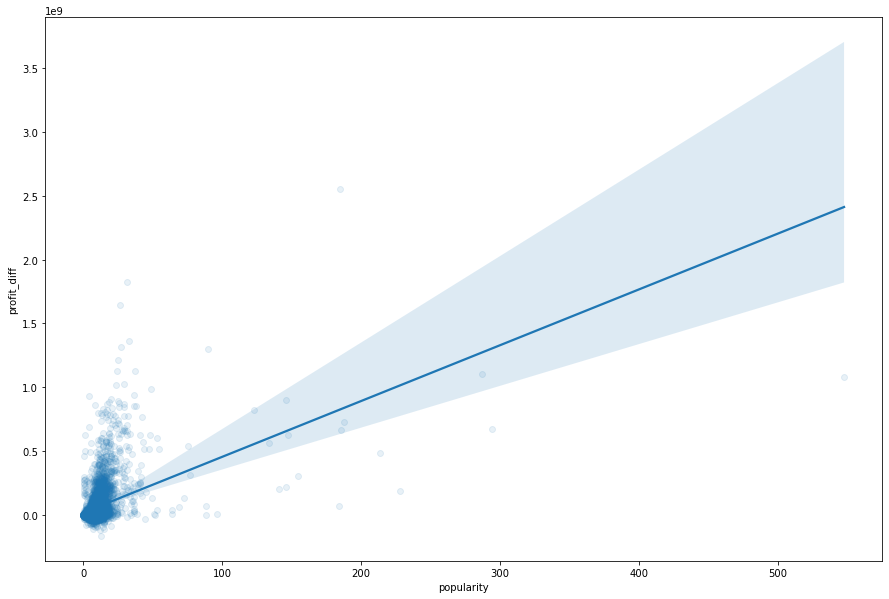

In [1142]:
df['popularity'] = df.popularity.astype('float')
plt.figure(figsize=(15,10))

sns.regplot(data = df, x = 'popularity', y = 'profit_diff', scatter_kws = {'alpha':0.1})

In [1138]:
df14 = df.loc[df['top10_mark']==0]
df14.profit_diff.describe()

count    4.680000e+03
mean     2.470257e+07
std      4.529601e+07
min     -1.657101e+08
25%     -2.560530e+06
50%      7.882782e+06
75%      4.177399e+07
max      1.758138e+08
Name: profit_diff, dtype: float64

In [916]:
df.loc[df['budget']<1000].shape

(0, 17)

In [917]:
df14.budget.shape

(4638,)

In [918]:
df13.budget.shape

(0,)

In [919]:
df = df.loc[df['revenue'] == 0]

In [920]:
df.loc[df['budget'] == 0]

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff,top10_mark,bottom90_mark


In [921]:
df66= df.loc[(df['top10_mark']!=1)]
df66.vote_average.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: vote_average, dtype: float64

In [922]:
df13 = df.loc[(df['profit_diff']>81500000) & (df['top10_mark']==1)]


df14 = df.loc[(df['profit_diff']<-59000000) & (df['top10_mark']==0)]

In [923]:
#df15 = df13.loc[df13['vote_count'] > 4000]
plt.figure(figsize=(16,17))
ax = sns.countplot(y="vote_count", data=df13, color = 'cornflowerblue')

ValueError: min() arg is an empty sequence

<Figure size 1152x1224 with 0 Axes>

In [924]:
df.vote_count.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: vote_count, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='runtime'>

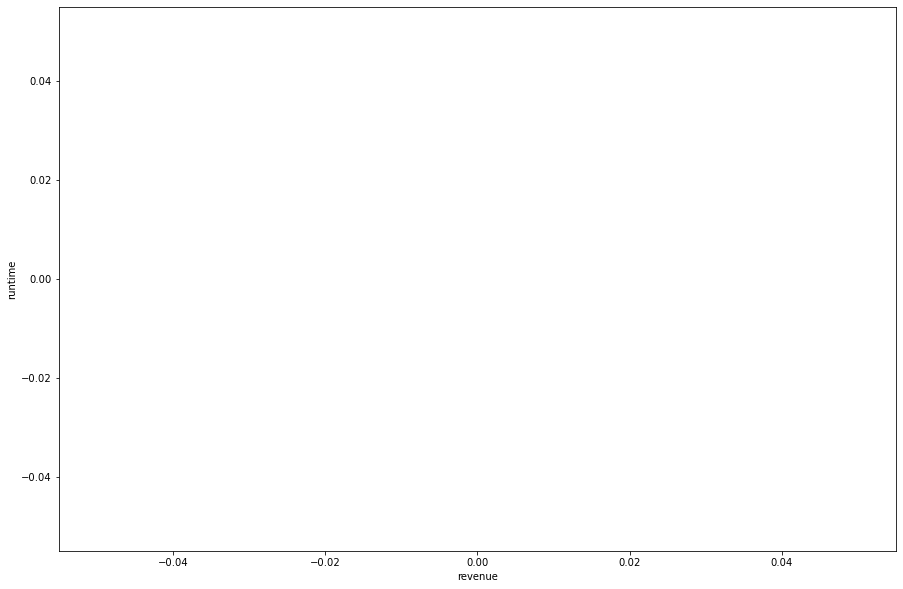

In [925]:
plt.figure(figsize=(15,10))
sns.regplot(data = df13, x = 'revenue', y = 'runtime', scatter_kws = {'alpha':0.1})

<AxesSubplot:xlabel='revenue', ylabel='vote_count'>

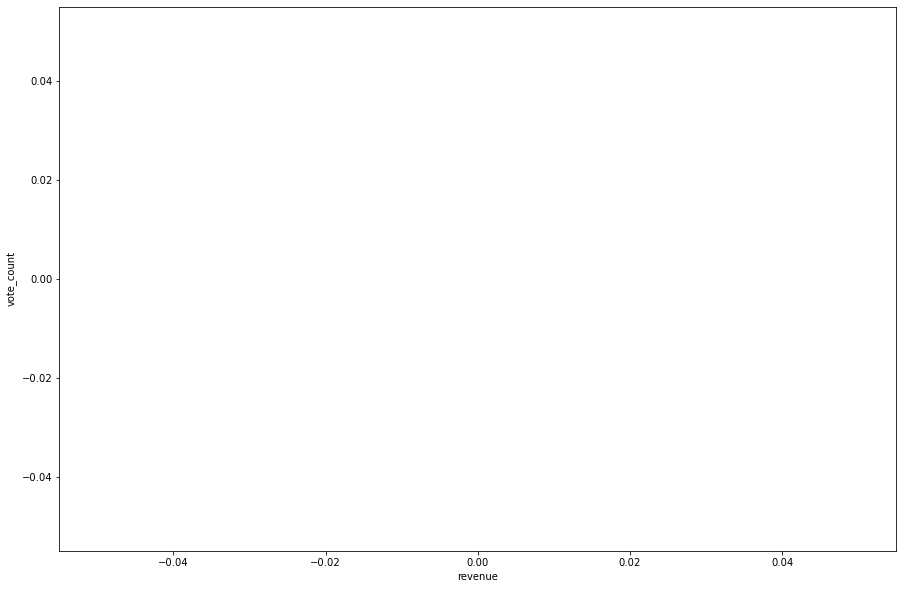

In [926]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'revenue', y = 'vote_count', scatter_kws = {'alpha':0.1})

<AxesSubplot:xlabel='budget', ylabel='vote_count'>

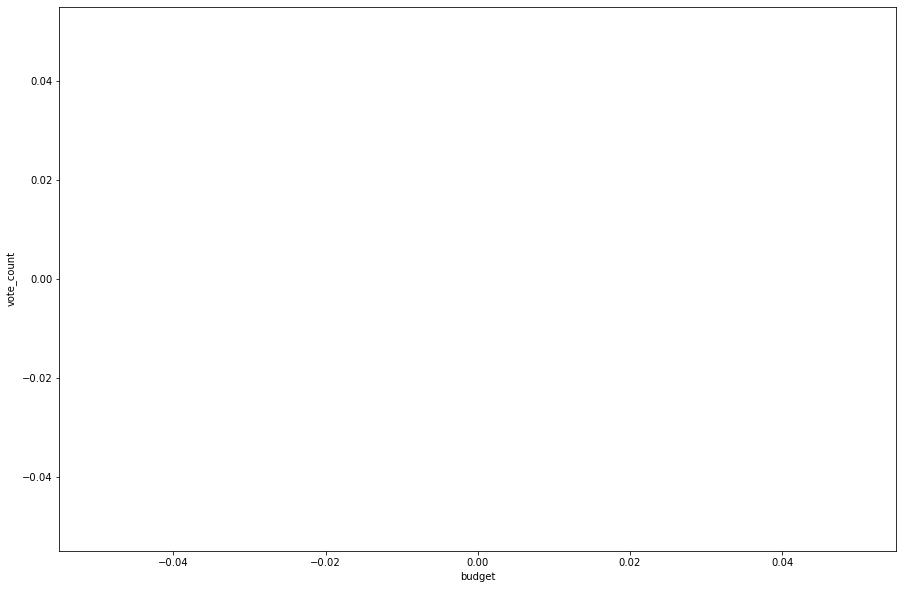

In [927]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'budget', y = 'vote_count', scatter_kws = {'alpha':0.1})

In [928]:
df12 = df.loc[df['top10_mark'] == 1]
#df12.profit_diff.describe()

In [929]:
df8 = df.loc[df['revenue']>244789384.00
]



In [930]:
df8.belongs_to_collection.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: belongs_to_collection, dtype: object

<AxesSubplot:xlabel='revenue', ylabel='runtime'>

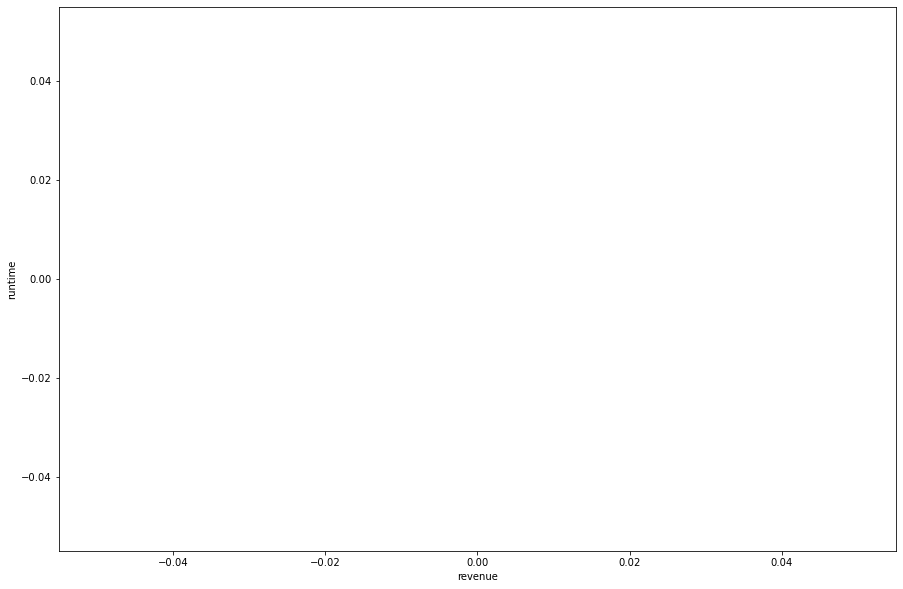

In [931]:
plt.figure(figsize=(15,10))
sns.regplot(data = df8, x = 'revenue', y = 'runtime', scatter_kws = {'alpha':0.1})

<AxesSubplot:xlabel='budget', ylabel='runtime'>

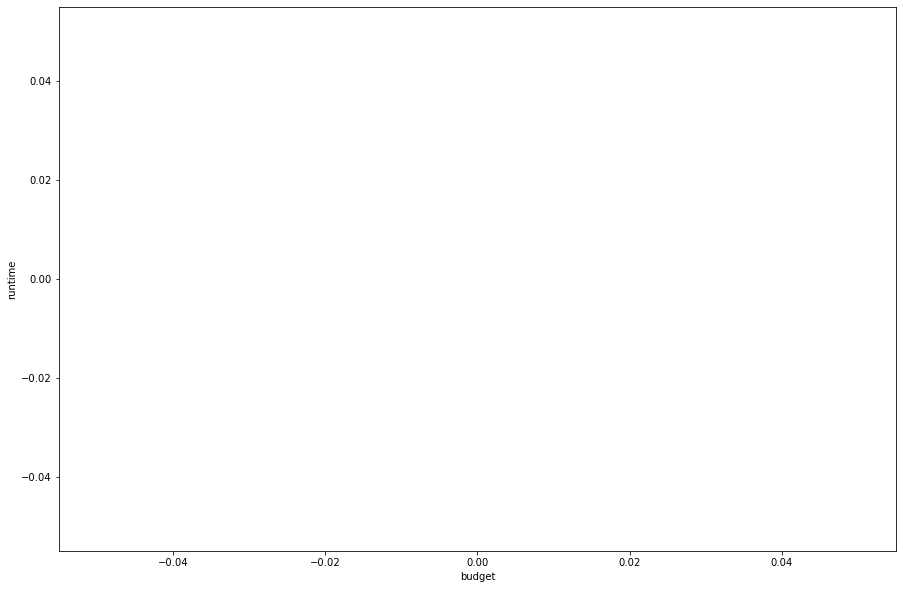

In [932]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'budget', y = 'runtime', scatter_kws = {'alpha':0.1})

In [933]:
df8.runtime.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: runtime, dtype: float64

In [934]:
df.runtime.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: runtime, dtype: float64

In [935]:
df.genre_new.describe()

AttributeError: 'DataFrame' object has no attribute 'genre_new'

In [936]:
df8.shape

(0, 17)

In [937]:
df8.genre_new.describe()

AttributeError: 'DataFrame' object has no attribute 'genre_new'

In [938]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="runtime", data=df8, color = 'cornflowerblue')

ValueError: min() arg is an empty sequence

<Figure size 1440x720 with 0 Axes>

In [939]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="genre_new", data=df8, color = 'cornflowerblue')

ValueError: Could not interpret input 'genre_new'

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='revenue', ylabel='profit_diff'>

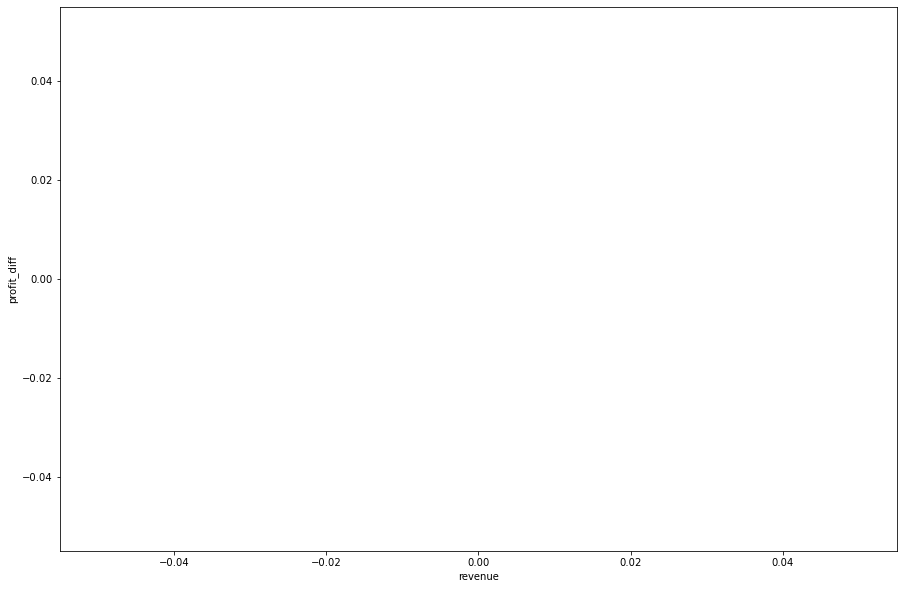

In [940]:
plt.figure(figsize=(15,10))
sns.regplot(data = df8, x = 'revenue', y = 'profit_diff', scatter_kws = {'alpha':0.1})

In [941]:
df.loc[(df['belongs_to_collection'].notnull()) & (df['bottom90_mark']==1)]

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff,top10_mark,bottom90_mark


In [942]:
df.revenue.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: revenue, dtype: float64

<AxesSubplot:xlabel='budget', ylabel='profit_diff'>

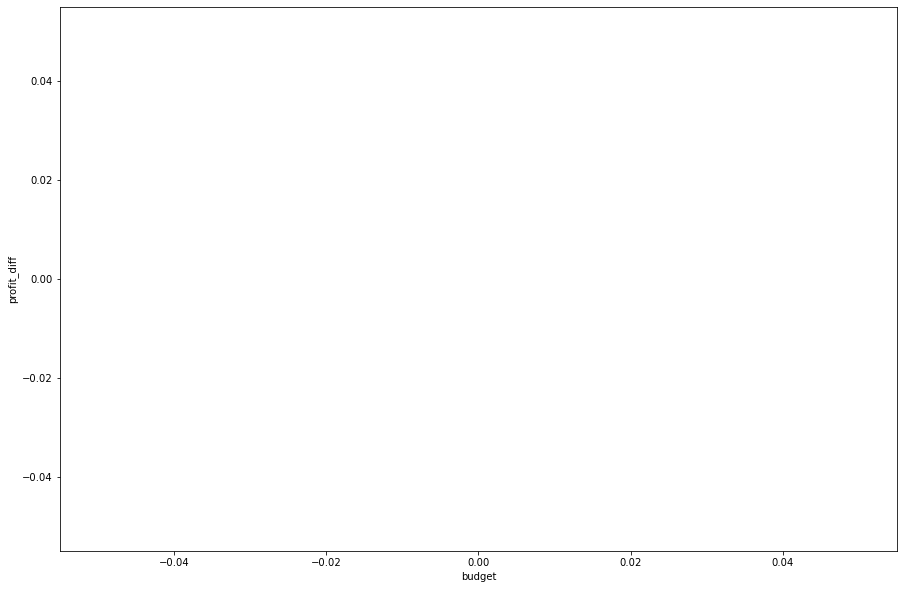

In [943]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'budget', y = 'profit_diff', scatter_kws = {'alpha':0.1})

<AxesSubplot:xlabel='revenue', ylabel='budget'>

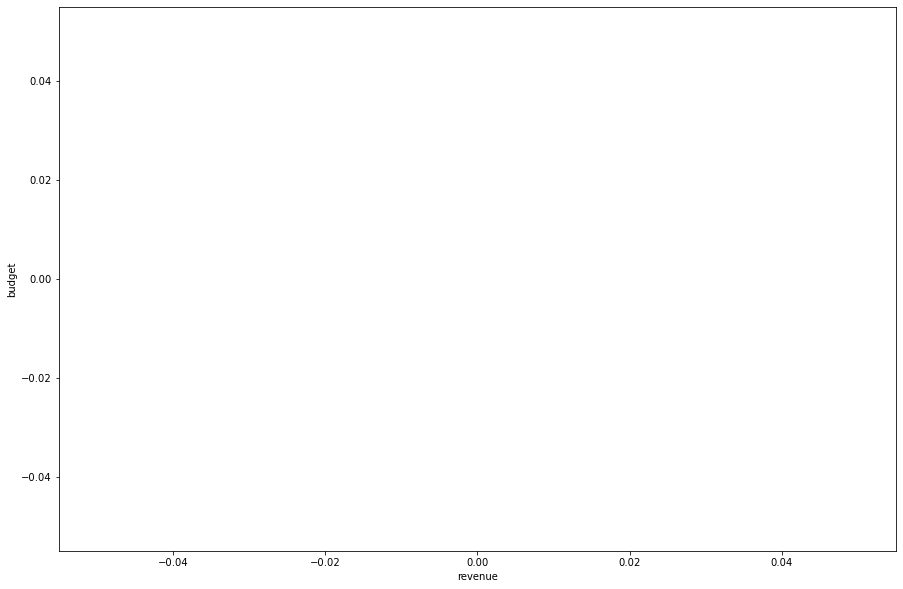

In [944]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'revenue', y = 'budget', scatter_kws = {'alpha':0.1})

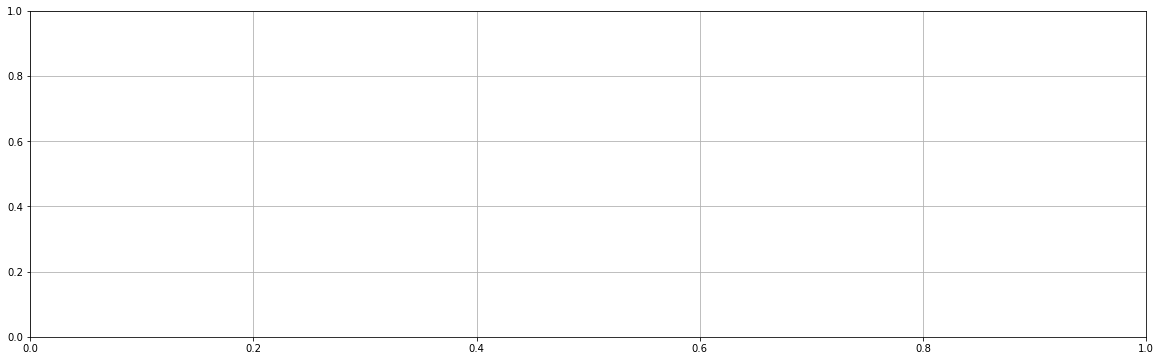

In [945]:
plt.figure(figsize=(20,6))

# analyze preschool experience, age of language initiation, and reading performance
plt.grid(True)
#sns.violinplot(data = df, x = 'revenue', y = 'budget', hue = 'genre_new', scale = 'area', inner = 'quartile', palette = 'Oranges_r');

In [946]:
plt.figure(figsize=(10,15))
#sns.regplot(data = df, x = 'year', y = 'budget', color = 'cornflowerblue', height=7, aspect=1);

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

In [947]:
plt.figure(figsize = (14,13))
#ax = plt.subplots(figsize=(10,5))
#plt.subplot(111)
# graph the distribution of math performance according to gender
#sns.violinplot(data = df, x = 'top10_mark', y = 'vote_average', palette = 'Blues', inner = 'quartile');
sns.boxplot(data = df, x = 'top10_mark', y = 'popularity');
#plt.subplot(132)
# graph the distribution of reading performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

ValueError: min() arg is an empty sequence

<Figure size 1008x936 with 0 Axes>

In [948]:
plt.figure(figsize=(10,14))
sns.boxplot(data = df, x = 'top10_mark', y = 'vote_count');

ValueError: min() arg is an empty sequence

<Figure size 720x1008 with 0 Axes>

In [949]:
df.loc[(df['belongs_to_collection'].notnull()) & (df['vote_count']>=1972.125)].shape

(0, 17)

In [950]:
df.vote_count.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: vote_count, dtype: float64

In [951]:
df.loc[df['vote_count'] >= 1972.125]

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff,top10_mark,bottom90_mark


<AxesSubplot:xlabel='vote_count', ylabel='vote_average'>

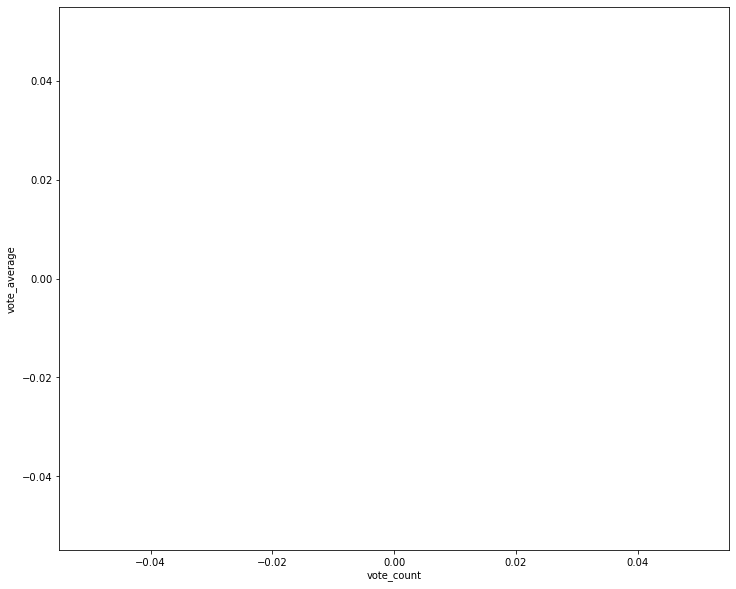

In [952]:
plt.figure(figsize=(12,10))
sns.regplot(data = df, x = 'vote_count', y = 'vote_average', scatter_kws = {'alpha':0.1}, )

In [953]:
scipys stats.linregress: slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

SyntaxError: invalid syntax (Temp/ipykernel_4220/3359019763.py, line 1)

In [954]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.regplot(data = df, x = 'vote_count', y = 'profit_diff', scatter_kws = {'alpha':0.1}, stat_func=r2)

TypeError: regplot() got an unexpected keyword argument 'stat_func'

<AxesSubplot:xlabel='vote_average', ylabel='budget'>

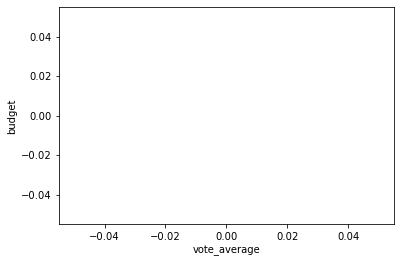

In [955]:
sns.regplot(data = df, x = 'vote_average', y = 'budget', scatter_kws = {'alpha':0.1})

<AxesSubplot:xlabel='vote_count', ylabel='profit_diff'>

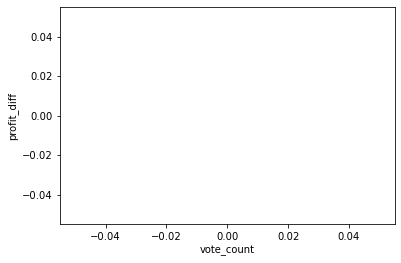

In [956]:
sns.regplot(data = df, x = 'vote_count', y = 'profit_diff', scatter_kws = {'alpha':0.1})

In [957]:
df.loc[df['budget']>87500000].shape

(0, 17)

In [958]:
df.shape

(0, 17)

ValueError: min() arg is an empty sequence

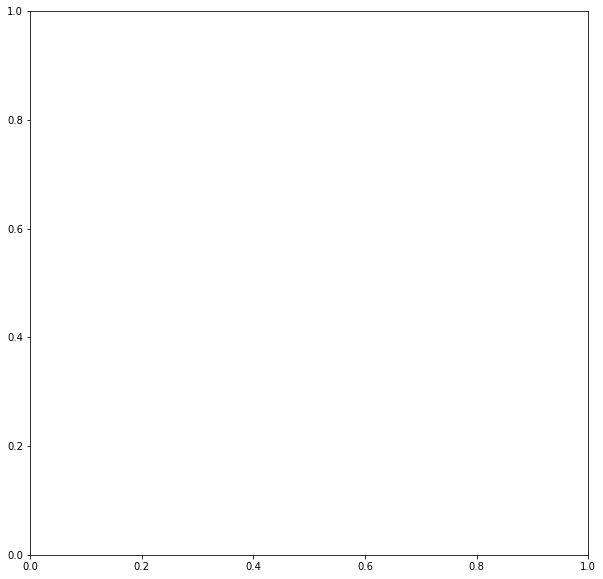

In [959]:
plt.figure(figsize = (10,10));
plt.subplot(111)
# graph the distribution of math performance according to gender
sns.violinplot(data = df, x = 'top10_mark', y = 'vote_count', palette = 'Blues', inner = 'quartile');
#plt.subplot(132)
# graph the distribution of reading performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

In [960]:


# plot the distribution of social status according to family parental structure
sns.catplot(data = df, x = 'top10_mark', y = 'vote_count', kind = 'boxen', color = 'cornflowerblue', height=7, aspect=1);

#plt.figure(figsize = (29,20))
#ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
#plt.xlabel('Family Structure')
#plt.ylabel('Social Status Index');
#matplotlib.pyplot.ylim(-0.3, 20000)

ValueError: min() arg is an empty sequence

In [961]:
df.head()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit_diff,top10_mark,bottom90_mark


In [962]:
#df.plot(x="year", y=["top10_mark", "bottom90_mark"], kind="bar")

In [217]:
#plt.figure(figsize = (16,10))
#plt.subplot(121)
# graph the distribution of math performance according to gender
#sns.violinplot(data = df, y = 'bottom90_mark', x = 'year', palette = 'RdBu', inner = 'quartile');
#plt.subplot(122)
#graph the distribution of reading performance according to gender
#sns.violinplot(data = df, y = 'top10_mark', x = 'year', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

plt.figure(figsize=(12,6))

 analyze preschool experience, age of language initiation, and reading performance
plt.grid(True)
sb.violinplot(data = df, y = 'year', x = 'age_lang_start', hue = 'preschool', scale = 'area', inner = 'quartile', palette = 'Oranges_r');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= "Preschool Experience");
plt.ylabel('Student Reading Score');
plt.xlabel('Age of Language Initiation (Test Language)');
plt.title('Preschool Advantage in Academic Performance over Language Intervals');

In [218]:
#prod_comp = df.groupby('year').value_counts()
#prod_comp

In [219]:
#df['spoken_languages'].value_counts()

In [220]:
# Split the breed counts into a top 10 list and all others.
#totals = df['spoken_languages'].value_counts()
#top_10_totals = totals[0:10]
#others = totals[10:]
# Also create a bottom 10 list.
#bottom_10_totals = totals[-10:]
#bottom_10_totals

In [221]:
# Combine the other breeds into a single value for plotting.
#top_10_totals.at['Other'] = others.sum()
#top_10_totals
#display(top_10_totals)


In [222]:

#pd.set_option('display.max_rows', 500)
#liste = list(zip(df['spoken_languages'].value_counts().keys(), df['spoken_languages'].value_counts()))
#df2 = pd.DataFrame (liste, columns = ['lang', 'counts'])[:377]
#display (df2)

In [223]:
#plt.pie(top_10_totals, labels = top_10_totals.index)
#plt.figsize = (500,500)
#plt.title('The Most spoken languages')
#plt.savefig('Dog Breed Proportions Pieplot.png', dpi=2000, bbox_inches = "tight")
#plt.show()

<AxesSubplot:>

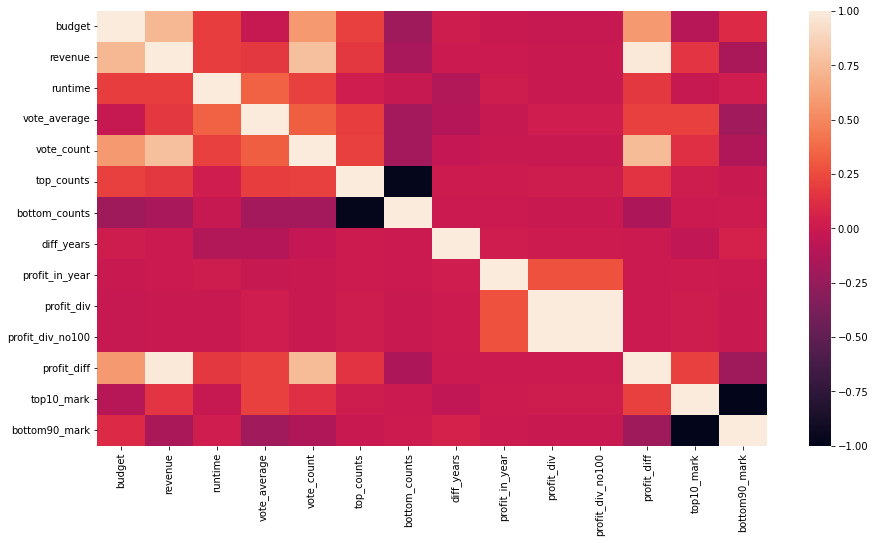

In [224]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [225]:
#df.loc[df['year'] > '2017']

In [226]:
#df = df.loc[df['year'] < '2018']

In [227]:
#Done in Power BI
#df = df.sort_values('year')
#plt.figure(figsize = (8,10))
#ax = sns.barplot(data = df, y = 'year', x = 'budget', color = 'cornflowerblue');
#ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
#plt.xlabel('Family Structure')
#plt.ylabel('Social Status Index');

 establish bin structure for standardized score of social status and student confidence
#std_bins = np.arange(-4.25,3.5,0.5)
 establish bin structure for academic scores
score_bins = np.arange(200,850,50)

plt.figure(figsize = (16, 12))
plt.subplot(221)
 plot density of family social status and math score
plt.hist2d(data = subpisa, x = 'status_index', y = 'avg_math_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Math Score');

In [228]:
#df = df.sort_values('year')
#plt.figure(figsize = (8,10))
#ax = sb.pointplot(data = df, y = 'year', x = 'top10_mark', color = 'cornflowerblue');
#ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
#plt.xlabel('Family Structure')
#plt.ylabel('Social Status Index');

In [229]:
#plt.figure(figsize=(8,10))
#sns.regplot(y="year", x="top10_mark", data=df)


plot the relationship for parental occupation and family social status across all levels of parental education
g = sb.FacetGrid(data = df, hue = 'parent_edu', palette = 'inferno', height = 6, aspect = 1.5);

 individual points will not be plotted to keep the graph simple and easy to read
g.map(sb.regplot, 'parent_occ', 'status_index', scatter_kws = {'alpha': 0});

 make the colors visible in the key so that the levels of parental education are clear
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title = "Parental Education");
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.ylabel('Family Social Status Index');
plt.xlabel('Parental Occupation Level');
plt.title('Parental Education, Occupation, and Social Status');

In [230]:
#df.loc[df['year'] > '2017']

In [1164]:
#df.belongs_to_collection.replace(np.NaN, 'NotSeries', inplace=True)
df['belongs_to_collection'] = df['belongs_to_collection'].fillna(0)

In [1165]:
df.belongs_to_collection.notnull().nunique()

1

In [233]:
#df.loc[df['belongs_to_collection'].notnull and df['top10_mark'] == '0' ]

df.loc[(df['belongs_to_collection'].notnull()) & (df['top10_mark']== 1)]

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark
0,Animation,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Toy Story,7.7,5415.0,1,0,2017-01-07,21.191400,58.758746,1245.180110,12.451801,343554033.0,1,0
1,Comedy,0,65000000,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Communications]",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Jumanji,6.9,2413.0,1,0,2017-01-07,21.065457,19.192722,404.303460,4.043035,197797249.0,1,0
3,Adventure,0,16000000,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Waiting to Exhale,6.1,34.0,1,0,2017-01-07,21.046291,24.188394,509.075975,5.090760,65452156.0,1,0
5,Family,0,60000000,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,"[English, Español]",Heat,7.7,1886.0,1,0,2017-01-07,21.065457,14.829714,312.394697,3.123947,127436818.0,1,0
8,Comedy,0,35000000,"[Action, Adventure, Thriller]",5.23158,"[Universal Pictures, Imperial Entertainment, Signature Entertainment]",[United States of America],1995-12-22,64350171.0,106.0,[English],Sudden Death,5.5,174.0,1,0,2017-01-07,21.046291,8.735868,183.857631,1.838576,29350171.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45139,Adventure,0,50000000,"[Comedy, Family, Animation]",33.694599,"[Columbia Pictures, Sony Pictures Animation]",[United States of America],2017-07-28,66913939.0,86.0,[English],The Emoji Movie,5.8,327.0,1,0,2017-01-07,-0.553057,-241.978360,133.827878,1.338279,16913939.0,1,0
45167,Drama,0,11000000,"[Action, Crime, Mystery, Thriller]",40.796775,"[Thunder Road Pictures, Star Thrower Entertainment, Acacia Filmed Entertainment]","[United Kingdom, United States of America, Canada]",2017-08-03,184770205.0,111.0,[English],Wind River,7.4,181.0,1,0,2017-01-07,-0.569485,-2949.559948,1679.729136,16.797291,173770205.0,1,0
45250,Documentary,0,12000000,"[Action, Comedy, Drama]",1.323587,[AVM Productions],[India],2007-06-14,19000000.0,185.0,"[தமிழ், తెలుగు]",Sivaji: The Boss,6.9,25.0,0,1,2017-01-07,9.568985,16.546513,158.333333,1.583333,7000000.0,1,0
45399,Action,0,750000,"[Crime, Comedy]",0.201582,"[Кинокомпания «Lunapark», Инвада фильм]",[Russia],2014-06-05,3.0,0.0,[Pусский],All at Once,6.0,4.0,0,1,2017-01-07,2.592798,0.000154,0.000400,0.000004,-749997.0,1,0


In [234]:
df.loc[(df['belongs_to_collection'].notnull()) & (df['bottom90_mark']==1)]

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark
13,Crime,0,44000000,"[History, Drama]",5.092,"[Hollywood Pictures, Cinergi Pictures Entertainment]",[United States of America],1995-12-22,13681765.0,192.0,[English],Nixon,7.1,72.0,1,0,2017-01-07,21.046291,1.477454,31.094920,0.310949,-30318235.0,0,1
14,Drama,0,98000000,"[Action, Adventure]",7.284477,"[Le Studio Canal+, Laurence Mark Productions, Metro-Goldwyn-Mayer (MGM), Carolco Pictures]","[France, Germany, Italy, United States of America]",1995-12-22,10017322.0,119.0,"[English, Latin]",Cutthroat Island,5.7,137.0,1,0,2017-01-07,21.046291,0.485680,10.221757,0.102218,-87982678.0,0,1
19,Adventure,0,60000000,"[Action, Comedy, Crime]",7.337906,[Columbia Pictures],[United States of America],1995-11-21,35431113.0,103.0,[English],Money Train,5.4,224.0,1,0,2017-01-07,21.131166,2.794538,59.051855,0.590519,-24568887.0,0,1
22,Action,0,50000000,"[Action, Adventure, Crime, Thriller]",11.065939,"[Silver Pictures, Canal+, Warner Bros., Dino De Laurentiis Company, Donner/Shuler-Donner Productions, Evansgideon/Lazar]","[France, United States of America]",1995-10-06,30303072.0,132.0,"[English, Español, Nederlands]",Assassins,6.0,394.0,1,0,2017-01-07,21.257110,2.851100,60.606144,0.606061,-19696928.0,0,1
28,Comedy,0,18000000,"[Fantasy, Science Fiction, Adventure]",9.822423,"[Procirep, Constellation Productions, France 3 Cinéma, Claudie Ossard Productions, Eurimages, MEDIA Programme of the European Union, Cofimage 5, Televisión Española (TVE), Tele München Fernseh Produktionsgesellschaft (TMG), Club d'Investissement Média, Canal+ España, Elías Querejeta Producciones Cinematográficas S.L., Centre National de la Cinématographie (CNC), Victoires Productions, Constellation, Lumière Pictures, Canal+, Studio Image, Cofimage 4, Ossane, Phoenix Images]","[France, Germany, Spain]",1995-05-16,1738611.0,108.0,"[广州话 / 廣州話, Français]",The City of Lost Children,7.6,308.0,1,0,2017-01-07,21.648631,0.446169,9.658950,0.096589,-16261389.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42805,Romance,0,40000000,"[Romance, Drama, War]",13.256679,[Eastern Sunrise Films],"[Turkey, United States of America]",2017-03-10,240978.0,111.0,[English],The Ottoman Lieutenant,6.5,38.0,1,0,2017-01-07,-0.169750,-3.549008,0.602445,0.006024,-39759022.0,0,1
42868,Action,0,30000000,"[Action, Adventure, Drama, History]",21.791111,"[Plan B Entertainment, Northern Ireland Screen, Sierra / Affinity, MICA Entertainment, MadRiver Pictures, Keep Your Head]","[United Kingdom, United States of America]",2016-10-15,8574339.0,140.0,"[English, Deutsch, Português, Español]",The Lost City of Z,6.1,598.0,1,0,2017-01-07,0.229984,124.274326,28.581130,0.285811,-21425661.0,0,1
43101,Drama,0,20000000,"[War, Drama, History, Romance]",3.573865,"[Pandastorm Pictures, Devil's Harvest Production, Andamar Entertainment]",[Canada],2017-02-23,557241.0,103.0,[English],Bitter Harvest,6.7,22.0,0,1,2017-01-07,-0.128682,-21.651925,2.786205,0.027862,-19442759.0,0,1
44021,Science Fiction,0,60000000,"[Adventure, Animation, Comedy, Family, Music]",6.55207,"[Reel FX Creative Studios, Dream Factory Group, Mandoo Pictures, Huayi Tencent Entertainment Company, Eracme Entertainment]","[China, United States of America]",2016-07-08,9420546.0,90.0,[English],Rock Dog,5.8,47.0,1,0,2017-01-07,0.501037,31.336829,15.700910,0.157009,-50579454.0,0,1


In [235]:
df.head()

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark
0,Animation,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Toy Story,7.7,5415.0,1,0,2017-01-07,21.191400,58.758746,1245.180110,12.451801,343554033.0,1,0
1,Comedy,0,65000000,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Communications]",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Jumanji,6.9,2413.0,1,0,2017-01-07,21.065457,19.192722,404.303460,4.043035,197797249.0,1,0
3,Adventure,0,16000000,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Waiting to Exhale,6.1,34.0,1,0,2017-01-07,21.046291,24.188394,509.075975,5.090760,65452156.0,1,0
5,Family,0,60000000,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,"[English, Español]",Heat,7.7,1886.0,1,0,2017-01-07,21.065457,14.829714,312.394697,3.123947,127436818.0,1,0
8,Comedy,0,35000000,"[Action, Adventure, Thriller]",5.23158,"[Universal Pictures, Imperial Entertainment, Signature Entertainment]",[United States of America],1995-12-22,64350171.0,106.0,[English],Sudden Death,5.5,174.0,1,0,2017-01-07,21.046291,8.735868,183.857631,1.838576,29350171.0,1,0


In [236]:
df['series_or_not'] = df['belongs_to_collection'][0]*0

In [237]:
df.head()

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not
0,Animation,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Toy Story,7.7,5415.0,1,0,2017-01-07,21.191400,58.758746,1245.180110,12.451801,343554033.0,1,0,
1,Comedy,0,65000000,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Communications]",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Jumanji,6.9,2413.0,1,0,2017-01-07,21.065457,19.192722,404.303460,4.043035,197797249.0,1,0,
3,Adventure,0,16000000,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Waiting to Exhale,6.1,34.0,1,0,2017-01-07,21.046291,24.188394,509.075975,5.090760,65452156.0,1,0,
5,Family,0,60000000,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,"[English, Español]",Heat,7.7,1886.0,1,0,2017-01-07,21.065457,14.829714,312.394697,3.123947,127436818.0,1,0,
8,Comedy,0,35000000,"[Action, Adventure, Thriller]",5.23158,"[Universal Pictures, Imperial Entertainment, Signature Entertainment]",[United States of America],1995-12-22,64350171.0,106.0,[English],Sudden Death,5.5,174.0,1,0,2017-01-07,21.046291,8.735868,183.857631,1.838576,29350171.0,1,0,


In [238]:
df.loc[df['top10_mark'] != 1]

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not
13,Crime,0,44000000,"[History, Drama]",5.092,"[Hollywood Pictures, Cinergi Pictures Entertainment]",[United States of America],1995-12-22,13681765.0,192.0,[English],Nixon,7.1,72.0,1,0,2017-01-07,21.046291,1.477454,31.094920,0.310949,-30318235.0,0,1,
14,Drama,0,98000000,"[Action, Adventure]",7.284477,"[Le Studio Canal+, Laurence Mark Productions, Metro-Goldwyn-Mayer (MGM), Carolco Pictures]","[France, Germany, Italy, United States of America]",1995-12-22,10017322.0,119.0,"[English, Latin]",Cutthroat Island,5.7,137.0,1,0,2017-01-07,21.046291,0.485680,10.221757,0.102218,-87982678.0,0,1,
19,Adventure,0,60000000,"[Action, Comedy, Crime]",7.337906,[Columbia Pictures],[United States of America],1995-11-21,35431113.0,103.0,[English],Money Train,5.4,224.0,1,0,2017-01-07,21.131166,2.794538,59.051855,0.590519,-24568887.0,0,1,
22,Action,0,50000000,"[Action, Adventure, Crime, Thriller]",11.065939,"[Silver Pictures, Canal+, Warner Bros., Dino De Laurentiis Company, Donner/Shuler-Donner Productions, Evansgideon/Lazar]","[France, United States of America]",1995-10-06,30303072.0,132.0,"[English, Español, Nederlands]",Assassins,6.0,394.0,1,0,2017-01-07,21.257110,2.851100,60.606144,0.606061,-19696928.0,0,1,
28,Comedy,0,18000000,"[Fantasy, Science Fiction, Adventure]",9.822423,"[Procirep, Constellation Productions, France 3 Cinéma, Claudie Ossard Productions, Eurimages, MEDIA Programme of the European Union, Cofimage 5, Televisión Española (TVE), Tele München Fernseh Produktionsgesellschaft (TMG), Club d'Investissement Média, Canal+ España, Elías Querejeta Producciones Cinematográficas S.L., Centre National de la Cinématographie (CNC), Victoires Productions, Constellation, Lumière Pictures, Canal+, Studio Image, Cofimage 4, Ossane, Phoenix Images]","[France, Germany, Spain]",1995-05-16,1738611.0,108.0,"[广州话 / 廣州話, Français]",The City of Lost Children,7.6,308.0,1,0,2017-01-07,21.648631,0.446169,9.658950,0.096589,-16261389.0,0,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42805,Romance,0,40000000,"[Romance, Drama, War]",13.256679,[Eastern Sunrise Films],"[Turkey, United States of America]",2017-03-10,240978.0,111.0,[English],The Ottoman Lieutenant,6.5,38.0,1,0,2017-01-07,-0.169750,-3.549008,0.602445,0.006024,-39759022.0,0,1,
42868,Action,0,30000000,"[Action, Adventure, Drama, History]",21.791111,"[Plan B Entertainment, Northern Ireland Screen, Sierra / Affinity, MICA Entertainment, MadRiver Pictures, Keep Your Head]","[United Kingdom, United States of America]",2016-10-15,8574339.0,140.0,"[English, Deutsch, Português, Español]",The Lost City of Z,6.1,598.0,1,0,2017-01-07,0.229984,124.274326,28.581130,0.285811,-21425661.0,0,1,
43101,Drama,0,20000000,"[War, Drama, History, Romance]",3.573865,"[Pandastorm Pictures, Devil's Harvest Production, Andamar Entertainment]",[Canada],2017-02-23,557241.0,103.0,[English],Bitter Harvest,6.7,22.0,0,1,2017-01-07,-0.128682,-21.651925,2.786205,0.027862,-19442759.0,0,1,
44021,Science Fiction,0,60000000,"[Adventure, Animation, Comedy, Family, Music]",6.55207,"[Reel FX Creative Studios, Dream Factory Group, Mandoo Pictures, Huayi Tencent Entertainment Company, Eracme Entertainment]","[China, United States of America]",2016-07-08,9420546.0,90.0,[English],Rock Dog,5.8,47.0,1,0,2017-01-07,0.501037,31.336829,15.700910,0.157009,-50579454.0,0,1,


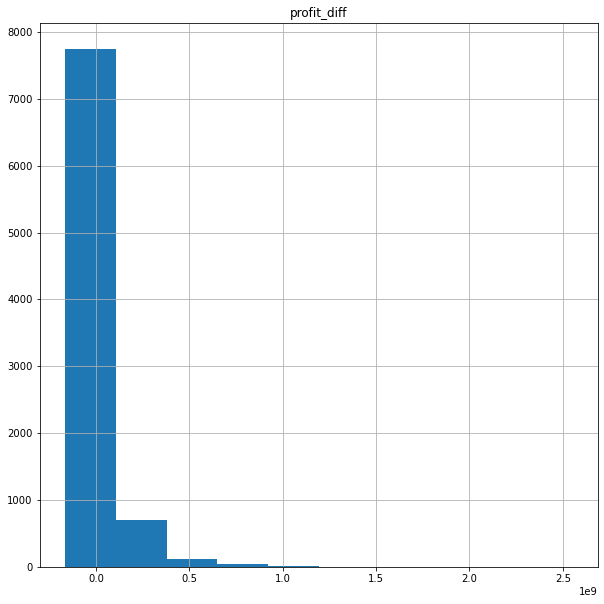

In [230]:
df.hist(column=['profit_diff'], figsize = (10,10));

<AxesSubplot:xlabel='profit_diff', ylabel='runtime'>

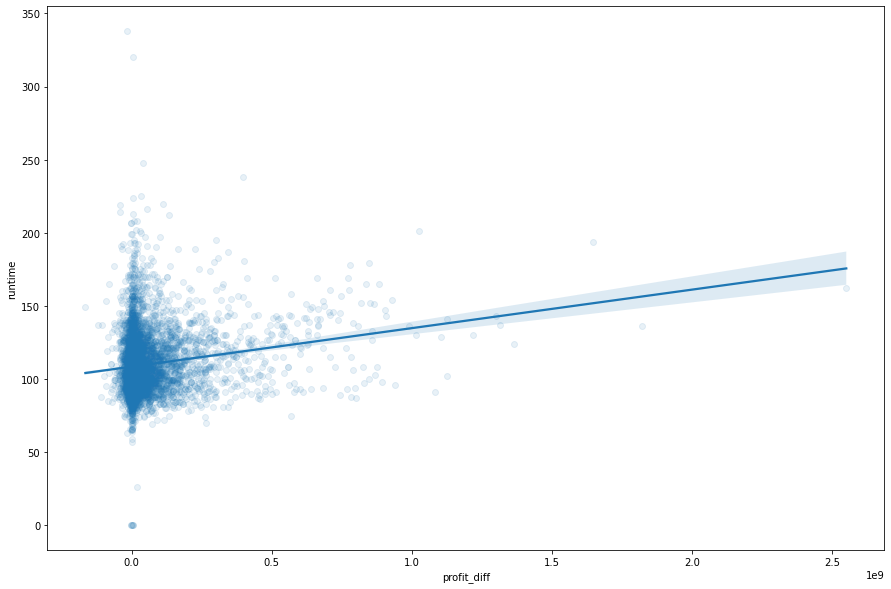

In [240]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'profit_diff', y = 'runtime', scatter_kws = {'alpha':0.1})

In [241]:
df.sample()

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not
21131,Fantasy,0,115000000,"[Science Fiction, Action, Drama, Thriller]",15.232738,"[TriStar Pictures, Media Rights Capital, Sony Pictures Entertainment (SPE), QED International, Alpha Core, Genre Films, Simon Kinberg Productions]",[United States of America],2013-08-07,286140700.0,109.0,[English],Elysium,6.4,3510.0,1,0,2017-01-07,3.419646,72.761336,248.818,2.48818,171140700.0,1,0,


In [165]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m-%d-%y')
#pd.to_datetime(df['year'], errors="ignore")
df.loc[df['release_date'].dt.year >= 2018, 'release_date'] -= pd.DateOffset(years=100)
#same like

#df['year'] = df['release_date'].dt.strftime("%Y")
#df.sample()

In [243]:
df.sample()

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not
18833,Romance,0,209000000,"[Thriller, Action, Adventure, Science Fiction]",13.106966,"[Universal Pictures, Hasbro, Bluegrass Films, Film 44]",[United States of America],2012-04-11,303025485.0,131.0,"[English, ภาษาไทย]",Battleship,5.5,2141.0,1,0,2017-01-07,4.742055,30.574987,144.98827,1.449883,94025485.0,1,0,


In [244]:
df['year'] = df['release_date'].dt.strftime("%Y")
#df.sample()

In [245]:
df.loc[df['year'] > '2018']

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not,year


In [246]:
#df['year'] = pd.to_datetime(df['year'], format='%y')
#pd.to_datetime(df['year'], errors="ignore")
#df.loc[df['year'].dt.year >= 2017, 'year'] -= pd.DateOffset(years=100)
#same like
#mask = df['DOB'].dt.year >= 2020
#df.loc[mask, 'DOB'] = df.loc[mask, 'DOB'] - pd.DateOffset(years=100)
print (df)

         genre_new  \
0        Animation   
1           Comedy   
3        Adventure   
5           Family   
8           Comedy   
...            ...   
45139    Adventure   
45167        Drama   
45250  Documentary   
45399       Action   
45412      History   

                                                                                                                                       belongs_to_collection  \
0      {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}   
1                                                                                                                                                          0   
3                                                                                                                                                          0   
5                                                                                              

In [247]:
#df.loc[df['year']>'2018']

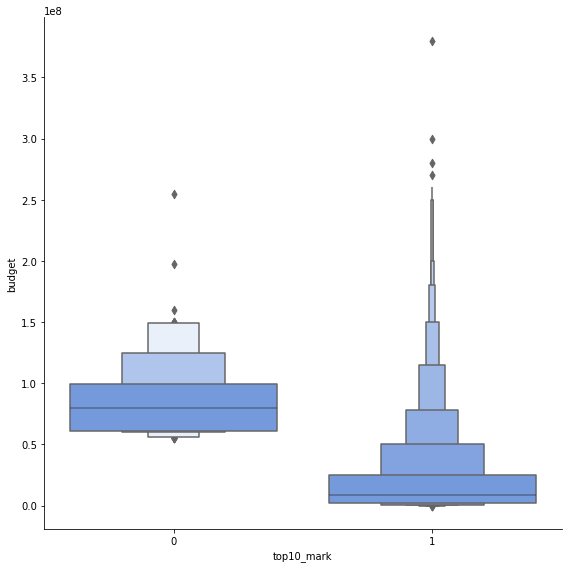

In [229]:
#plt.figure(figsize = (10,13))
#plt.subplot(111)
# graph the distribution of math performance according to gender
sns.catplot(data = df, x = 'top10_mark', y = 'budget', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);
#plt.subplot(132)
# graph the distribution of reading performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

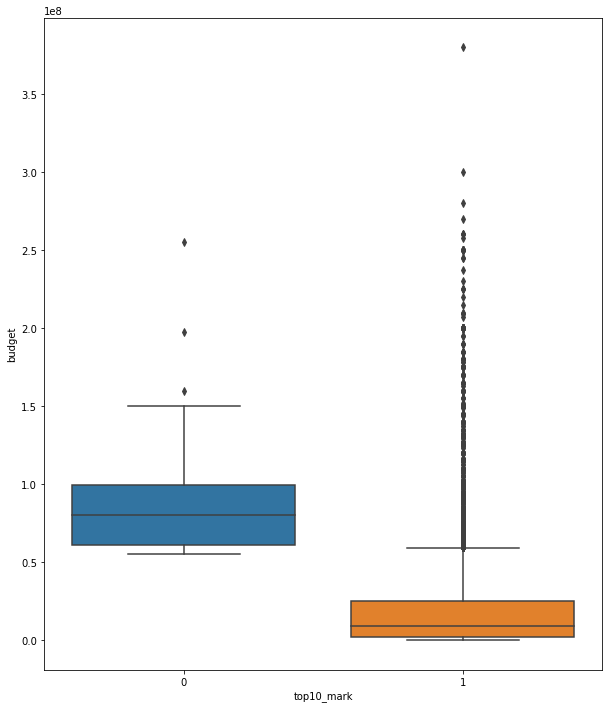

In [228]:
plt.figure(figsize=(10,12))
sns.boxplot(data = df, x = 'top10_mark', y = 'budget');



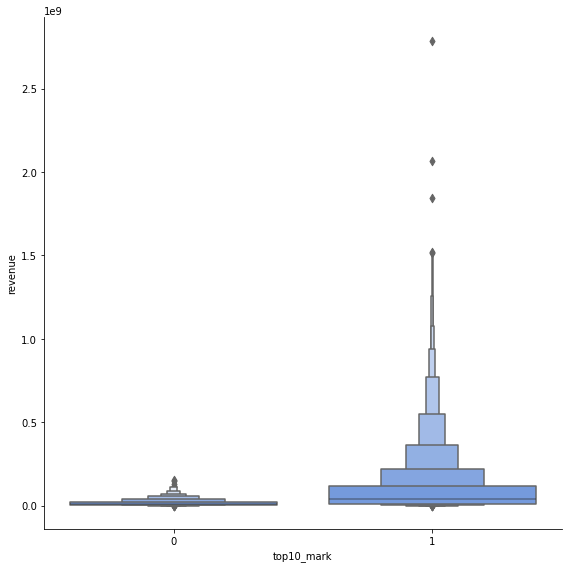

In [250]:
#plt.figure(figsize = (10,13))
#plt.subplot(111)
# graph the distribution of math performance according to gender
sns.catplot(data = df, x = 'top10_mark', y = 'revenue', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);
#plt.subplot(132)
# graph the distribution of reading performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

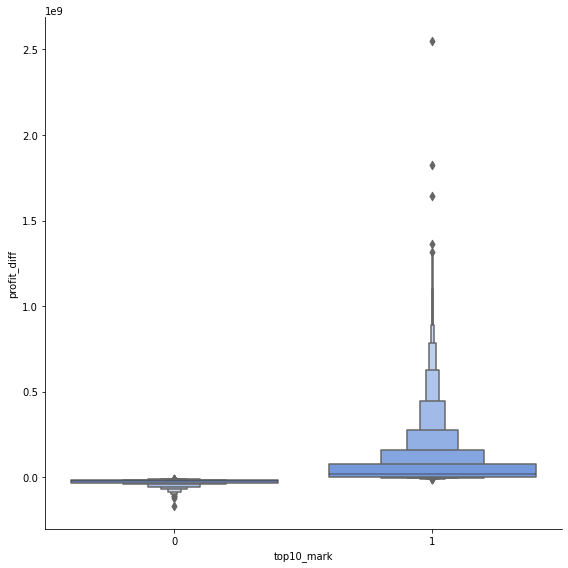

In [251]:
#plt.figure(figsize = (10,13))
#plt.subplot(111)
# graph the distribution of math performance according to gender
sns.catplot(data = df, x = 'top10_mark', y = 'profit_diff', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);
#plt.subplot(132)
# graph the distribution of reading performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
#plt.subplot(133)
# graph the distribution of science performance according to gender
#sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');

In [252]:
df.year.value_counts()

2011    232
2016    232
2010    225
2013    222
2006    209
2015    209
2014    208
2012    202
2009    202
2008    196
2007    188
2005    177
2004    165
2002    151
2001    140
2003    133
1999    132
2000    125
1998    112
1997    112
1996    100
1995     99
1993     83
1988     75
1991     74
1994     73
1992     71
2017     71
1990     61
1989     60
1984     57
1987     56
1986     55
1985     54
1981     44
1983     40
1982     36
1980     30
1978     23
1979     23
1977     21
1976     20
1971     18
1970     18
1975     17
1968     17
1967     17
1973     16
1974     15
1961     15
1963     14
1972     14
1962     13
1960     12
1956     12
1964     12
1966     11
1953     11
1965      9
1954      9
1969      9
1948      8
1951      8
1958      7
1959      6
1936      6
1939      6
1942      6
1950      6
1933      6
1941      6
1955      6
1935      5
1944      5
1925      5
1945      5
1957      5
1940      5
1946      4
1952      4
1928      4
1931      4
1938      3
1932

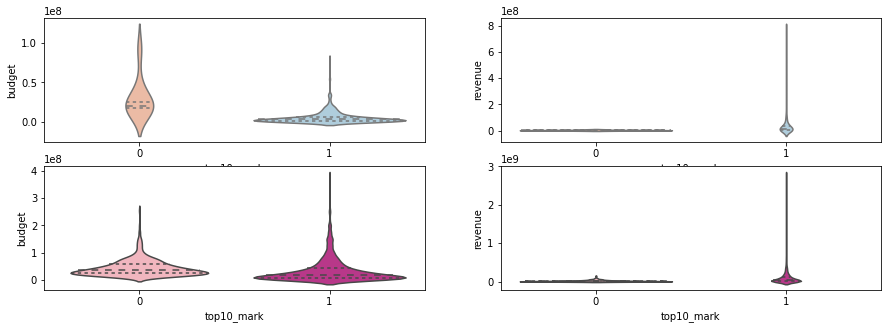

In [253]:
#df2 = df
df2 = df.loc[df['year']<'1982']
df3 = df.loc[df['year']>'1982']

#df2.sample()
#sns.catplot(data = df2, x = 'top10_mark', y = 'revenue', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);




plt.figure(figsize = (15,5))
plt.subplot(221)
# graph the distribution of math performance according to gender
sns.violinplot(data = df2, x = 'top10_mark', y = 'budget', palette = 'RdBu', inner = 'quartile');
plt.subplot(222)
# graph the distribution of reading performance according to gender
sns.violinplot(data = df2, x = 'top10_mark', y = 'revenue', palette = 'RdBu', inner = 'quartile');
plt.subplot(223)
# graph the distribution of math performance according to gender
sns.violinplot(data = df3, x = 'top10_mark', y = 'budget', palette = 'RdPu', inner = 'quartile');
plt.subplot(224)
# graph the distribution of reading performance according to gender
sns.violinplot(data = df3, x = 'top10_mark', y = 'revenue', palette = 'RdPu', inner = 'quartile');


In [254]:
df.profit_diff.describe()

count    5.200000e+03
mean     6.125131e+07
std      1.415030e+08
min     -1.657101e+08
25%     -1.413868e+06
50%      1.250000e+07
75%      6.566740e+07
max      2.550965e+09
Name: profit_diff, dtype: float64

In [255]:
pd.cut(df['profit_diff'], bins=15).value_counts()

(-168426765.177, 15401588.467]      2735
(15401588.467, 196513266.933]       1999
(196513266.933, 377624945.4]         280
(377624945.4, 558736623.867]          91
(558736623.867, 739848302.333]        48
(739848302.333, 920959980.8]          31
(920959980.8, 1102071659.267]          6
(1102071659.267, 1283183337.733]       4
(1283183337.733, 1464295016.2]         3
(1464295016.2, 1645406694.667]         1
(1645406694.667, 1826518373.133]       1
(2369853408.533, 2550965087.0]         1
(1826518373.133, 2007630051.6]         0
(2007630051.6, 2188741730.067]         0
(2188741730.067, 2369853408.533]       0
Name: profit_diff, dtype: int64

In [256]:
for i in df['production_countries']:
    if i != 'United States of America':
        

IndentationError: expected an indented block (Temp/ipykernel_3016/979182705.py, line 3)

In [257]:
df.vote_count.describe()

count     5200.000000
mean       757.036923
std       1265.942310
min          0.000000
25%         89.000000
50%        293.000000
75%        842.250000
max      14075.000000
Name: vote_count, dtype: float64

In [258]:
df.popularity.describe()

count     5200.000000
unique    5199.000000
top          9.003792
freq         2.000000
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity', ylabel='vote_average'>

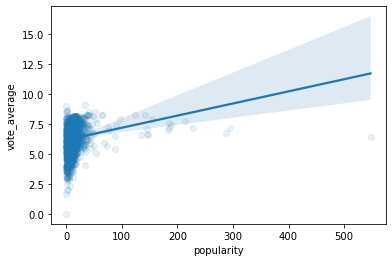

In [371]:
sns.regplot(data = df, x = 'popularity', y = 'vote_average', scatter_kws = {'alpha':0.1})

In [ ]:
sns.regplot(data = df, x = 'popularity', y = 'vote_average', scatter_kws = {'alpha':0.1})

In [1239]:
plt.figure(figsize=(10,12))
sns.boxplot(data = df, x = 'top10_mark', y = 'popularity');



ValueError: Could not interpret input 'top10_mark'

<Figure size 720x864 with 0 Axes>

In [263]:
df.runtime.describe()

count    5200.000000
mean      110.055577
std        21.702321
min         0.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

In [264]:
#plt.figure(figsize=(20,12))
#df.sort_values('year')
#sns.barplot(data=df, x='year', y='top10_mark')
df.loc[(df['top10_mark'] != 1) & (df['year']<'1990')].shape

(32, 26)

In [265]:
df.loc[df['year']]

KeyError: "None of [Index(['1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995',\n       '1995',\n       ...\n       '2017', '2012', '2011', '2005', '2017', '2017', '2017', '2007', '2014',\n       '2010'],\n      dtype='object', length=5200)] are in the [index]"

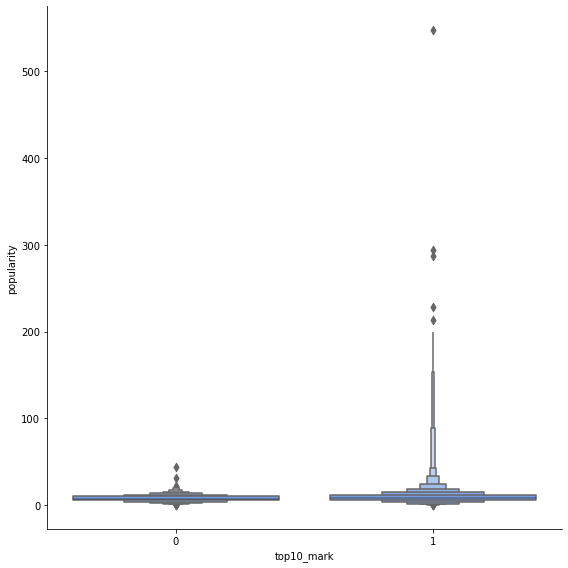

In [266]:
# graph the distribution of math performance according to gender
sns.catplot(data = df, x = 'top10_mark', y = 'popularity', kind = 'boxen', color = 'cornflowerblue', height=8, aspect=1);

In [267]:
# Max outlier = 62550965000+(1.5)()

In [268]:
#df.hist(column=['profit_diff'], figsize = (10,10), bins=(1000000));

In [269]:
#df.loc[df['profit_diff']<0 | df['production_countries'] != 'United States of America' ]

#df4 = df.loc[(df['profit_diff']<0)]

#df5 = df.loc[(df['profit_diff']>0)]

#df5.hist(column=['budget'], figsize = (10,10));


In [1167]:
df.to_csv('movie_dataset_master.csv', index=False)

In [271]:
#df1 = pd.read_csv('movie_dataset_master.csv')

In [272]:
#df['correct'] = (df['year'] > '2017')

In [273]:
#df.sample()

In [274]:
#df.correct.value_counts()

In [275]:
#df.loc[df['correct'] == True]


In [276]:
#df['year'] = df.year.astype('int')
#df['hund'] = df.year.astype('int')
#df.info()

In [277]:
#df['year'] = pd.to_numeric(df['year'],errors = 'coerce')
#df['hund'] = pd.to_numeric(df['hund'],errors = 'coerce')

In [278]:
df1 = df.loc[(df['belongs_to_collection'].notnull()) & (df['bottom90_mark']==1)]
df1.belongs_to_collection.describe()

count     520
unique     33
top         0
freq      487
Name: belongs_to_collection, dtype: int64

In [279]:
df2 = df.loc[(df['budget']> 38000000) & (df['top10_mark']==1)]
df2
#df2.describe()
#df2.budget.describe()

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not,year
1,Comedy,0,65000000,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Communications]",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Jumanji,6.9,2413.0,1,0,2017-01-07,21.065457,19.192722,404.303460,4.043035,197797249.0,1,0,,1995
5,Family,0,60000000,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,"[English, Español]",Heat,7.7,1886.0,1,0,2017-01-07,21.065457,14.829714,312.394697,3.123947,127436818.0,1,0,,1995
9,Drama,"{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}",58000000,"[Adventure, Action, Thriller]",14.686036,"[United Artists, Eon Productions]","[United Kingdom, United States of America]",1995-11-16,352194034.0,130.0,"[English, Pусский, Español]",GoldenEye,6.6,1194.0,1,0,2017-01-07,21.144856,28.717675,607.231093,6.072311,294194034.0,1,0,,1995
10,Romance,0,62000000,"[Comedy, Drama, Romance]",6.318445,"[Columbia Pictures, Castle Rock Entertainment]",[United States of America],1995-11-17,107879496.0,106.0,[English],The American President,6.5,199.0,1,0,2017-01-07,21.142118,8.229979,173.999187,1.739992,45879496.0,1,0,,1995
15,Thriller,0,52000000,"[Drama, Crime]",10.137389,"[Universal Pictures, Légende Entreprises, Syalis DA, De Fina-Cappa]","[France, United States of America]",1995-11-22,116112375.0,178.0,[English],Casino,7.8,1343.0,1,0,2017-01-07,21.128428,10.568369,223.293029,2.232930,64112375.0,1,0,,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44274,Documentary,"{'id': 173710, 'name': 'Planet of the Apes (Reboot) Collection', 'poster_path': '/qQrEMycfVN2gRlKTLWGn0QdOnSk.jpg', 'backdrop_path': '/mepJpyqVtD6P65vgCU1ngGFEjs5.jpg'}",152000000,"[Drama, Science Fiction, War]",146.161786,[Chernin Entertainment],"[Canada, United States of America]",2017-07-11,369907963.0,140.0,[English],War for the Planet of the Apes,6.7,1675.0,1,0,2017-01-07,-0.506513,-480.462693,243.360502,2.433605,217907963.0,1,0,,2017
44678,Documentary,0,100000000,"[Action, Drama, History, Thriller, War]",30.938854,"[Canal+, Studio Canal, Warner Bros., Syncopy, RatPac-Dune Entertainment, Kaap Holland Film]","[Netherlands, France, United Kingdom, United States of America]",2017-07-19,519876949.0,107.0,"[English, Français, Deutsch]",Dunkirk,7.5,2712.0,1,0,2017-01-07,-0.528416,-983.840189,519.876949,5.198769,419876949.0,1,0,,2017
44842,Romance,"{'id': 8650, 'name': 'Transformers Collection', 'poster_path': '/vOUPHWV8aGXq4yYQ2csje5LdT6g.jpg', 'backdrop_path': '/zvZBNNDWd5LcsIBpDhJyCB2MDT7.jpg'}",260000000,"[Action, Science Fiction, Thriller, Adventure]",39.186819,"[Paramount Pictures, Di Bonaventura Pictures, Angry Films, Hasbro Studios]",[United States of America],2017-06-21,604942143.0,149.0,[English],Transformers: The Last Knight,6.2,1440.0,1,0,2017-01-07,-0.451755,-515.036319,232.670055,2.326701,344942143.0,1,0,,2017
45014,Comedy,0,60000000,"[Action, Western, Science Fiction, Fantasy, Horror]",50.903593,"[Imagine Entertainment, Weed Road Pictures, Media Rights Capital, Sony Pictures Entertainment]","[South Africa, United States of America]",2017-08-03,71000000.0,95.0,[English],The Dark Tower,5.7,688.0,1,0,2017-01-07,-0.569485,-207.790204,118.333333,1.183333,11000000.0,1,0,,2017


In [1168]:
df2 = df.loc[(df['genre_new'].notnull()) & (df['top10_mark']!=1)]
df2.genre_new.describe()

KeyError: 'genre_new'

In [281]:
df2 = df.loc[(df['genre_new'].notnull()) & (df['top10_mark']==1)]
df2.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,top_counts,bottom_counts,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark
count,4.680000e+03,4680.000000,4.680000e+03,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4.680000e+03,4.680000e+03,4.680000e+03,4.680000e+03,4680.0,4680.0
mean,3.070420e+07,10.268093,1.016673e+08,109.932051,6.348483,812.657479,0.899573,0.096795,9.932613,1.491766e+04,5.809479e+05,5.809479e+03,7.096306e+07,1.0,0.0
std,4.127763e+07,14.644544,1.751842e+08,21.619188,0.875560,1318.356476,0.300601,0.295710,17.321293,1.140044e+06,2.290225e+07,2.290225e+05,1.458462e+08,0.0,0.0
min,1.000000e+00,0.030576,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-54.974435,-4.455455e+07,9.375000e-05,9.375000e-07,-1.184867e+07,1.0,0.0
25%,5.000000e+06,5.858630,9.578946e+06,95.000000,5.800000,95.000000,1.000000,0.000000,3.818696,6.106251e+00,1.135816e+02,1.135816e+00,7.200000e+05,1.0,0.0
50%,1.500000e+07,8.719727,3.814789e+07,106.000000,6.400000,325.000000,1.000000,0.000000,10.127518,1.842270e+01,2.381854e+02,2.381854e+00,1.850378e+07,1.0,0.0
75%,3.800000e+07,12.071933,1.163250e+08,120.000000,7.000000,924.500000,1.000000,0.000000,19.225583,5.169806e+01,4.667666e+02,4.667666e+00,7.549137e+07,1.0,0.0
max,3.800000e+08,547.488298,2.787965e+09,320.000000,9.100000,14075.000000,1.000000,1.000000,44.986550,4.249353e+07,1.239638e+09,1.239638e+07,2.550965e+09,1.0,0.0


In [282]:
df.loc[df['vote_count']>1972.125]

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not,year
0,Animation,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,3.735540e+08,81.0,[English],Toy Story,7.7,5415.0,1,0,2017-01-07,21.191400,58.758746,1245.180110,12.451801,343554033.0,1,0,,1995
1,Comedy,0,65000000,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Communications]",[United States of America],1995-12-15,2.627972e+08,104.0,"[English, Français]",Jumanji,6.9,2413.0,1,0,2017-01-07,21.065457,19.192722,404.303460,4.043035,197797249.0,1,0,,1995
31,Comedy,0,29500000,"[Science Fiction, Thriller, Mystery]",12.297305,"[Universal Pictures, Atlas Entertainment, Classico]",[United States of America],1995-12-29,1.688400e+08,129.0,"[English, Français]",Twelve Monkeys,7.4,2470.0,1,0,2017-01-07,21.027126,27.219078,572.338983,5.723390,139340000.0,1,0,,1995
46,Crime,0,33000000,"[Crime, Mystery, Thriller]",18.457430,"[New Line Cinema, Juno Pix, Cecchi Gori Pictures]",[United States of America],1995-09-22,3.273119e+08,127.0,[English],Se7en,8.1,5915.0,1,0,2017-01-07,21.295441,46.575891,991.854118,9.918541,294311859.0,1,0,,1995
49,Action,0,6000000,"[Drama, Crime, Thriller]",16.302466,"[Blue Parrot Productions, Bad Hat Harry Productions]",[United States of America],1995-07-19,2.334157e+07,106.0,"[Español, English, Français, Magyar]",The Usual Suspects,8.1,3334.0,1,0,2017-01-07,21.473405,18.116649,389.026133,3.890261,17341568.0,1,0,,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43238,Drama,0,125000000,"[Thriller, Action, Adventure]",33.704935,"[Universal Pictures, Sean Daniel Company, Secret Hideout]",[United States of America],2017-06-06,4.077780e+08,110.0,"[العربية, English, ภาษาไทย]",The Mummy,5.4,2122.0,1,0,2017-01-07,-0.410686,-794.335258,326.222410,3.262224,282778013.0,1,0,,2017
43255,Animation,"{'id': 9485, 'name': 'The Fast and the Furious Collection', 'poster_path': '/mCkqJf4ijbNoBWvJ0RTWZJuhJUA.jpg', 'backdrop_path': '/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg'}",250000000,"[Action, Crime, Thriller]",48.573287,"[Universal Pictures, Original Film, One Race Films]",[United States of America],2017-04-12,1.238765e+09,136.0,[English],The Fate of the Furious,6.8,3803.0,1,0,2017-01-07,-0.260101,-1905.050693,495.505906,4.955059,988764765.0,1,0,,2017
43644,Drama,0,34000000,"[Action, Crime]",228.032744,"[Big Talk Productions, TriStar Pictures, Media Rights Capital, Working Title Films, Double Negative]","[United Kingdom, United States of America]",2017-06-28,2.245113e+08,113.0,[English],Baby Driver,7.2,2083.0,1,0,2017-01-07,-0.470920,-1402.207172,660.327409,6.603274,190511319.0,1,0,,2017
44009,Horror,"{'id': 86066, 'name': 'Despicable Me Collection', 'poster_path': '/xIXhIlZDRmSSfNbpN7kBCm5hg39.jpg', 'backdrop_path': '/15IZl405E664QDVxpFJBl7TtLmw.jpg'}",80000000,"[Action, Animation, Adventure, Family, Comedy]",36.631519,[Illumination Entertainment],[United States of America],2017-06-15,1.020063e+09,96.0,[English],Despicable Me 3,6.2,2002.0,1,0,2017-01-07,-0.435327,-2929.013369,1275.079230,12.750792,940063384.0,1,0,,2017


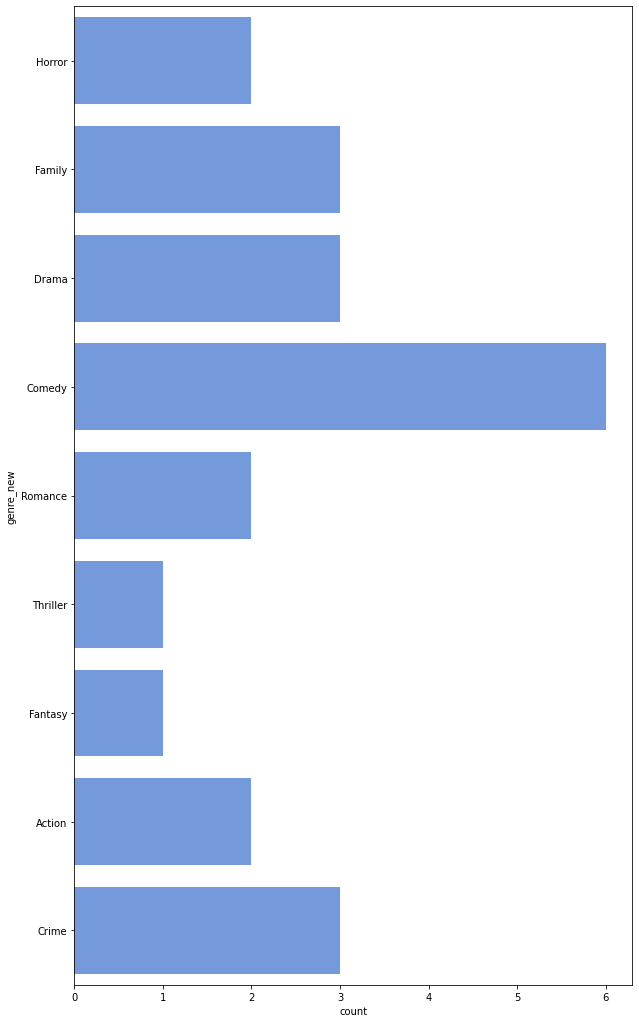

In [528]:
df9 = df.loc[(df['budget']>87500000) & (df['top10_mark']==1)]
#df1.budget.describe()

#plt.figure(figsize = (14,13))
#ax = plt.subplots(figsize=(10,5))
#plt.subplot(111)
# graph the distribution of math performance according to gender
#sns.violinplot(data = df, x = 'top10_mark', y = 'vote_average', palette = 'Blues', inner = 'quartile');
#sns.boxplot(data = df1, y = 'top10_mark', x = 'genre_new');
#df1.plot.hist(column=["genre_new"], figsize=(10, 8))
#plt.figure(figsize = (10,10))
#s = pd.Series(np.random.choice(list(df1['genre_new']), 1000))
#counts = s.value_counts()
#ax = counts.iloc[:400].plot(kind="barh")
#ax.invert_yaxis()
plt.figure(figsize=(10,18))
ax = sns.countplot(y="year", data=df9, color = 'cornflowerblue')

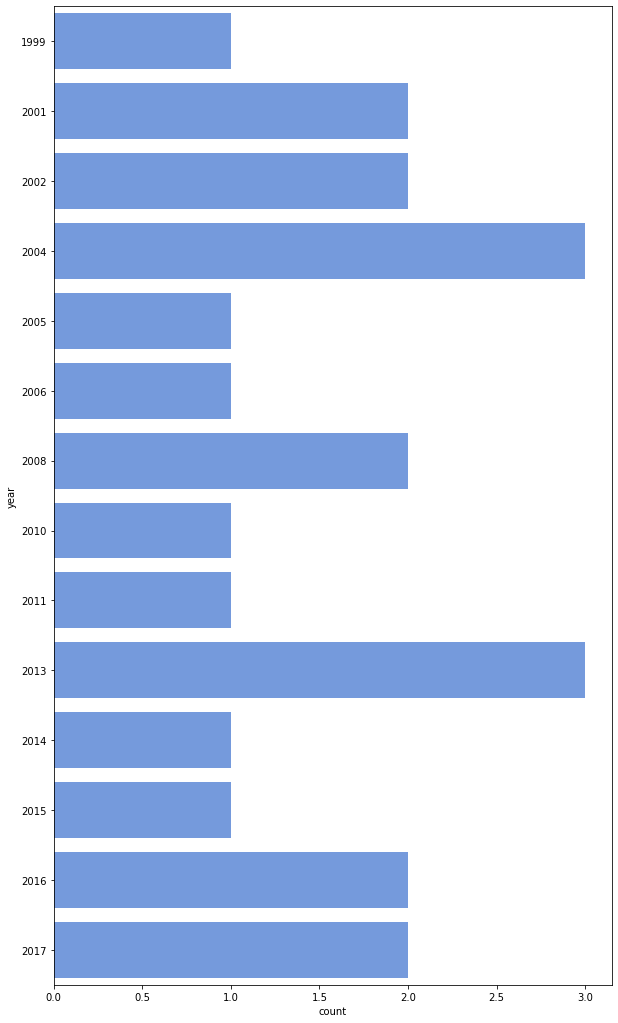

In [546]:
df9 = df.loc[(df['budget']>104000000) & (df['top10_mark']!=1)]
#df1.budget.describe()

#plt.figure(figsize = (14,13))
#ax = plt.subplots(figsize=(10,5))
#plt.subplot(111)
# graph the distribution of math performance according to gender
#sns.violinplot(data = df, x = 'top10_mark', y = 'vote_average', palette = 'Blues', inner = 'quartile');
#sns.boxplot(data = df1, y = 'top10_mark', x = 'genre_new');
#df1.plot.hist(column=["genre_new"], figsize=(10, 8))
#plt.figure(figsize = (10,10))
#s = pd.Series(np.random.choice(list(df1['genre_new']), 1000))
#counts = s.value_counts()
#ax = counts.iloc[:400].plot(kind="barh")
#ax.invert_yaxis()
plt.figure(figsize=(10,18))
ax = sns.countplot(y="production", data=df9, color = 'cornflowerblue')

<AxesSubplot:xlabel='budget', ylabel='revenue'>

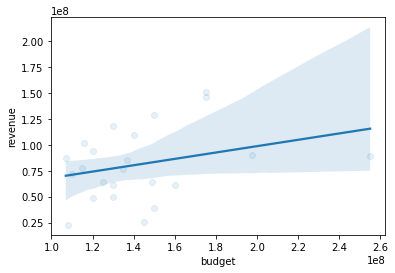

In [533]:
sns.regplot(data = df9, x = 'budget', y = 'revenue', scatter_kws = {'alpha':0.1})

In [541]:
df9.runtime.describe()
#df9.describe(include=[np.number])

count     23.000000
mean     122.304348
std       23.580490
min       85.000000
25%      105.000000
50%      121.000000
75%      136.000000
max      170.000000
Name: runtime, dtype: float64

In [547]:
df.profit_diff.describe()

count    5.200000e+03
mean     6.125131e+07
std      1.415030e+08
min     -1.657101e+08
25%     -1.413868e+06
50%      1.250000e+07
75%      6.566740e+07
max      2.550965e+09
Name: profit_diff, dtype: float64

In [542]:
df.loc[df['top10_mark']!=1].runtime.describe()

count    520.000000
mean     111.167308
std       22.427466
min       63.000000
25%       97.000000
50%      107.000000
75%      120.000000
max      338.000000
Name: runtime, dtype: float64

In [535]:
df9.revenue.describe()
#df9.describe(include=[np.number])

count    2.300000e+01
mean     8.112157e+07
std      3.439463e+07
min      2.267856e+07
25%      6.167370e+07
50%      7.762826e+07
75%      9.797288e+07
max      1.509625e+08
Name: revenue, dtype: float64

In [537]:
df.loc[df['top10_mark']!=1].revenue.describe()

count    5.200000e+02
mean     1.792043e+07
std      2.161027e+07
min      1.200000e+01
25%      3.855004e+06
50%      1.117465e+07
75%      2.257491e+07
max      1.509625e+08
Name: revenue, dtype: float64

In [536]:
df.revenue.describe()

count    5.200000e+03
mean     9.329257e+07
std      1.682199e+08
min      1.000000e+00
25%      8.176244e+06
50%      3.207873e+07
75%      1.028215e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [530]:
df.loc[df['top10_mark']!=1].runtime.describe()

count    520.000000
mean     111.167308
std       22.427466
min       63.000000
25%       97.000000
50%      107.000000
75%      120.000000
max      338.000000
Name: runtime, dtype: float64

In [512]:
df.loc[df['top10_mark']==1].revenue.describe()

count    4.680000e+03
mean     1.016673e+08
std      1.751842e+08
min      1.000000e+00
25%      9.578946e+06
50%      3.814789e+07
75%      1.163250e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [506]:
dfy = df9.loc[df['year'] < '2000']
dfy.shape

(37, 26)

In [505]:
df.shape

(5200, 26)

In [510]:
dfy = df.loc[df['year'] < '2000']
dfy.shape

(1913, 26)

In [508]:
dfy = df.loc[df['year'] == '2000']
dfy.shape

(125, 26)

In [361]:
df4 = df.loc[df['vote_average']<3]
plt.figure(figsize=(10,15))
#df4.sort_values('year')
#sns.barplot(data = df4, x = 'year', color = 'cornflowerblue');

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

In [369]:
df4

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not,year
16535,Comedy,0,1119000,"[Drama, History]",0.948775,[Metro-Goldwyn-Mayer (MGM)],[United States of America],1936-08-28,2019000.0,103.0,[English],The Gorgeous Hussy,2.5,2.0,0,1,2017-01-07,-19.639007,-9.187275,180.428954,1.804290,900000.0,1,0,,1936
8552,Drama,0,15000,[Horror],1.274228,[Fairway International Pictures],[United States of America],1962-06-08,3274.0,90.0,[English],Eegah,2.8,18.0,0,1,2017-01-07,-45.416401,-0.480590,21.826667,0.218267,-11726.0,1,0,,1962
2628,Romance,0,2000000,[Drama],0.910047,"[American Playhouse, Cinétudes Films]",[United States of America],1986-12-24,1301121.0,111.0,[English],Native Son,2.0,2.0,0,1,2017-01-07,30.040316,2.165625,65.056050,0.650560,-698879.0,1,0,,1986
2842,Drama,0,700000,[Drama],0.101618,[Red-horse Native],[United States of America],1999-10-08,10508.0,107.0,[English],Naturally Native,0.0,0.0,0,1,2017-01-07,17.251552,0.087015,1.501143,0.015011,-689492.0,1,0,,1999
6723,Comedy,"{'id': 117927, 'name': 'House of the Dead Collection', 'poster_path': '/jZiLJV1yUez60J361t8fN2zDMEu.jpg', 'backdrop_path': None}",7000000,"[Horror, Action, Thriller]",5.701278,"[Boll Kino Beteiligungs GmbH & Co. KG, Brightlight Pictures, Herold Productions, Mindfire Entertainment]","[Canada, Germany, United States of America]",2003-04-11,13818181.0,90.0,[English],House of the Dead,2.8,106.0,1,0,2017-01-07,13.744293,14.362513,197.402586,1.974026,6818181.0,1,0,,2003
25732,Comedy,0,65000000,"[Animation, Action, Comedy, Family]",6.693589,"[Threshold Entertainment, Lions Gate Family Entertainment]",[United States of America],2012-06-15,73706.0,87.0,[English],Foodfight!,2.3,28.0,1,0,2017-01-07,4.564091,0.024845,0.113394,0.001134,-64926294.0,0,1,,2012
44383,Thriller,0,7000000,"[Drama, Crime, Action]",2.482771,"[Hollywood Storm, Czar Pictures]",[Russia],2014-04-17,855450.0,83.0,"[English, Pусский]",Black Rose,2.0,6.0,0,1,2017-01-07,2.726955,4.481450,12.220714,0.122207,-6144550.0,1,0,,2014
43515,Thriller,0,3500000,"[Romance, Comedy, Adventure]",0.524653,[WSB],[Russia],2014-08-21,179000.0,95.0,[Pусский],"Kidnapping, Caucasian Style",1.7,6.0,0,1,2017-01-07,2.381979,2.147074,5.114286,0.051143,-3321000.0,1,0,,2014


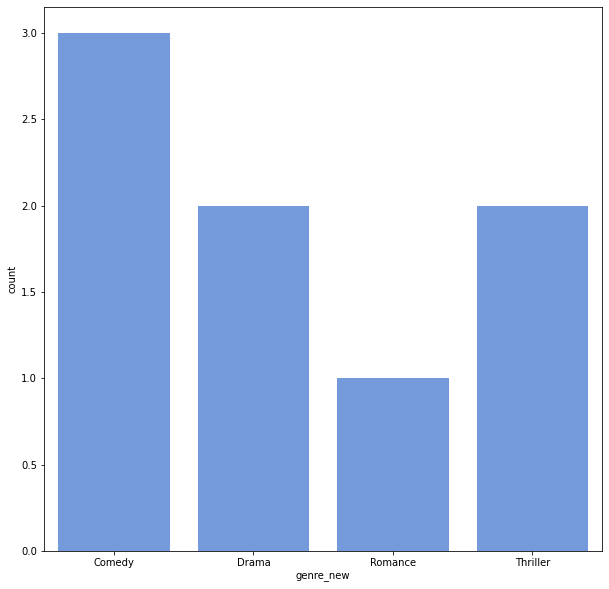

In [368]:
#sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("df4")
plt.figure(figsize=(10,10))
ax = sns.countplot(x="genre_new", data=df4, color = 'cornflowerblue')

In [316]:
df4.shape

(8, 26)

<AxesSubplot:xlabel='runtime', ylabel='profit_diff'>

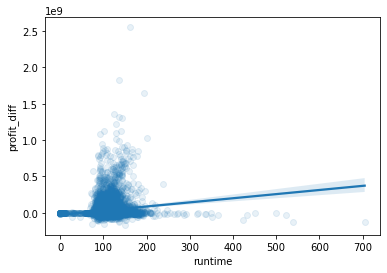

In [227]:
sns.regplot(data = df, x = 'runtime', y = 'profit_diff', scatter_kws = {'alpha':0.1})

In [376]:
df.runtime.describe()

count    5200.000000
mean      110.055577
std        21.702321
min         0.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

<AxesSubplot:xlabel='runtime', ylabel='profit_diff'>

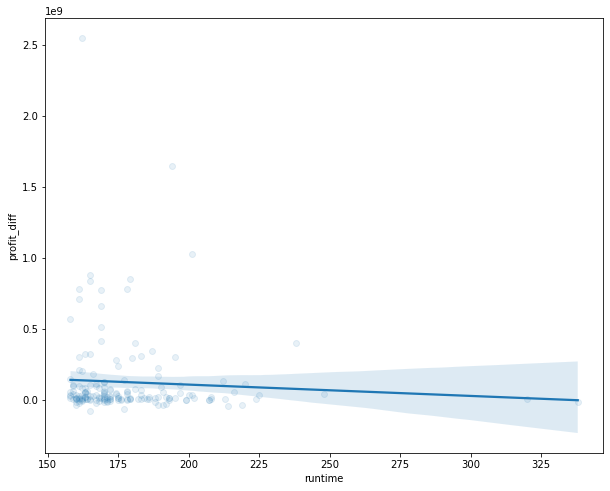

In [398]:
plt.figure(figsize=(10,8))
df5 = df.loc[df['runtime']>157.5]
sns.regplot(data = df5, x = 'runtime', y = 'profit_diff', scatter_kws = {'alpha':0.1})

In [399]:
df5.top10_mark.shape

(171,)

In [400]:
df5.year.value_counts()

2015    9
2007    9
2013    9
2012    7
2008    7
2009    6
1995    6
1999    5
1998    5
2014    5
2016    5
1962    4
2011    4
2002    4
2004    4
2006    4
1956    4
2001    4
1965    4
1960    3
1961    3
2000    3
1966    3
1963    3
1997    3
2003    3
1994    2
1988    2
1991    2
1990    2
2005    2
1985    2
1984    2
1983    2
1974    2
1970    2
1968    2
1964    2
2010    1
1939    1
1987    1
1996    1
1993    1
1951    1
1954    1
1957    1
1959    1
1969    1
1971    1
1972    1
1975    1
1977    1
1978    1
1980    1
1981    1
1982    1
1946    1
1992    1
2017    1
Name: year, dtype: int64

In [406]:
df5.shape

(171, 26)

In [408]:
df5.loc[df5['year']<'2000'].shape

(84, 26)

In [409]:
df5.loc[df5['year']>='2000'].shape

(87, 26)

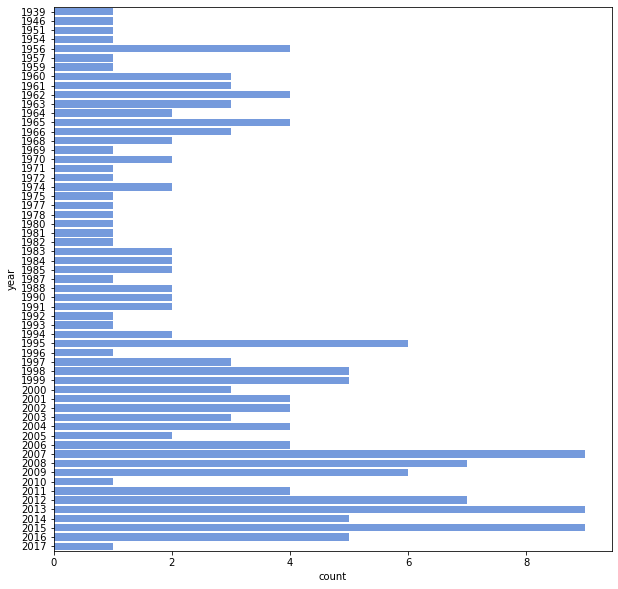

In [402]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y="year", data=df5, color = 'cornflowerblue')

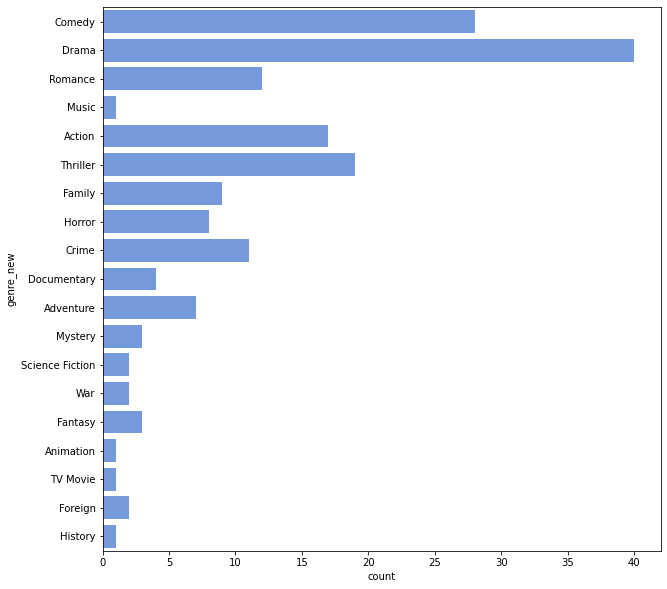

In [410]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y="genre_new", data=df5, color = 'cornflowerblue')

<AxesSubplot:xlabel='runtime', ylabel='profit_diff'>

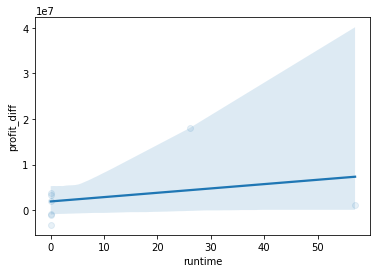

In [391]:
df5 = df.loc[df['runtime']<57.5]
sns.regplot(data = df5, x = 'runtime', y = 'profit_diff', scatter_kws = {'alpha':0.1})

In [392]:
df5.shape

(8, 26)

,genre_new,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,top_counts,bottom_counts,until_this_date,diff_years,profit_in_year,profit_div,profit_div_no100,profit_diff,top10_mark,bottom90_mark,series_or_not,year
42170,Comedy,"{'id': 453993, 'name': 'The Wolverine Collection', 'poster_path': '/8Ht4a5A5Ypxh0PjbVoRTzm1kAu3.jpg', 'backdrop_path': '/QtSxEuCwcZSfCTMZfER3nHDVsG.jpg'}",97000000,"[Action, Drama, Science Fiction]",54.581997,"[Twentieth Century Fox Film Corporation, Donners' Company, Marvel Entertainment, TSG Entertainment]",[United States of America],2017-02-28,616801808.0,137.0,"[English, Español]",Logan,7.6,6310.0,1,0,2017-01-07,-0.142371,-4466.340887,635.878153,6.358782,519801808.0,1,0,,2017


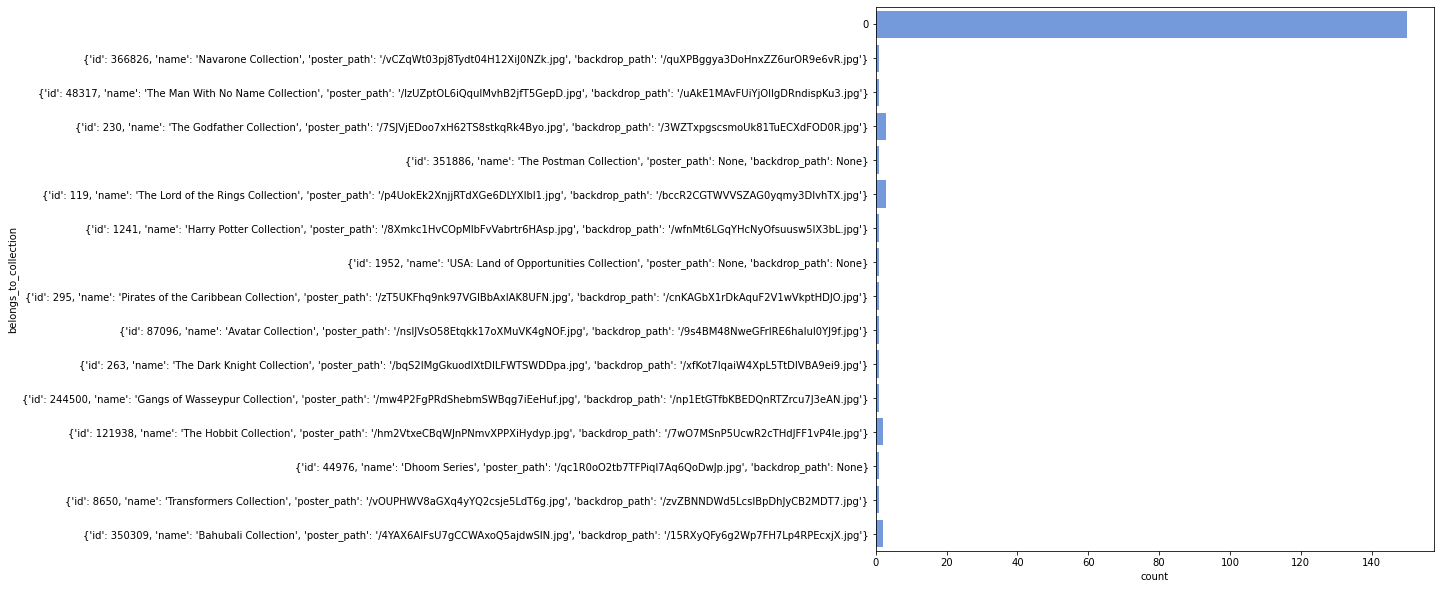

In [451]:
df6 = df.loc[df['vote_count']>=1972.125]
plt.figure(figsize=(10,10))
ax = sns.countplot(y="belongs_to_collection", data=df5, color = 'cornflowerblue')
df6.loc[df6['title'] == 'Logan']

In [417]:
df6 = df.loc[df['vote_count']>=1972.125]
df6.shape

(523, 26)

In [432]:
df.title.nunique()

5098

In [433]:
df.shape

(5200, 26)

In [441]:
df7 = df[df.title.duplicated()]


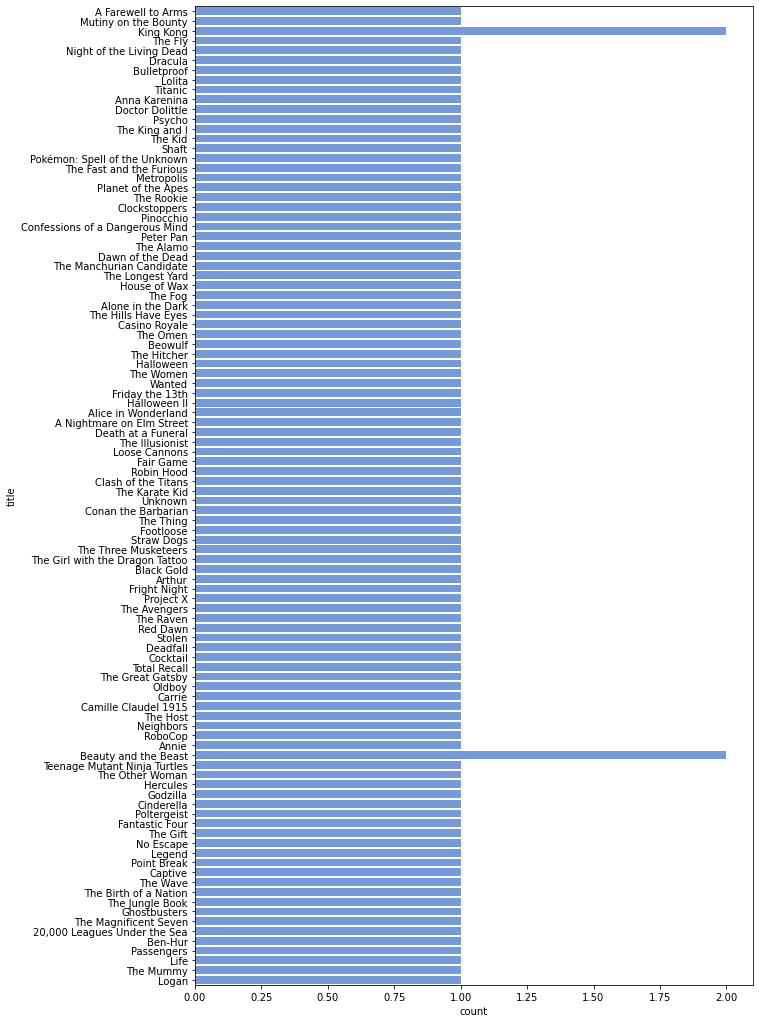

In [443]:
plt.figure(figsize=(10,18))
ax = sns.countplot(y="title", data=df7, color = 'cornflowerblue')

In [550]:
#df10 = df.loc[df['top10_mark']==1]
df10 = df.loc[(df['year']>'2000') & (df['top10_mark']!=1)]
plt.pie(top_10_totals, labels = top_10_totals.index)
plt.title('The Most Common Breeds of Dogs on We Rate Dogs')
plt.savefig('Dog Breed Proportions Pieplot.png', dpi=500, bbox_inches = "tight")
plt.show()

In [557]:
df.revenue.describe()

count    5.200000e+03
mean     9.329257e+07
std      1.682199e+08
min      1.000000e+00
25%      8.176244e+06
50%      3.207873e+07
75%      1.028215e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [556]:
df.loc[df['top10_mark']!=1].budget.describe()

count    5.200000e+02
mean     4.407479e+07
std      3.038877e+07
min      1.200000e+07
25%      2.400000e+07
50%      3.500000e+07
75%      5.600000e+07
max      2.550000e+08
Name: budget, dtype: float64

In [283]:
#df['hund'] = 100
#df['year'] = df.loc[df['year'] > 2017] - df['hund']
#df.sample()
#df.loc[df['year'] > '2017']

In [284]:
#df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%m-%y')
#pd.to_datetime(df['year'], errors="ignore")
#df.loc[df['release_date'].dt.year >= 2018, 'release_date'] -= pd.DateOffset(years=100)
#same like
#mask = df['DOB'].dt.year >= 2020
#df.loc[mask, 'DOB'] = df.loc[mask, 'DOB'] - pd.DateOffset(years=100)
#print (df)


#df ['year'] = df ['year'].astype ('datetime64[ns]')
#pd.to_datetime(df['year'], errors="ignore")

#for i in df['release_date']>2017:
 #       if i > 2017:
        #df['year'] = df['year'] - 100
        
        
        
     # ["year"] = df["year"].apply(lambda x: "19" + x[2:])



In [285]:
#df.loc[df['release_date'].dt.year < 2017]

In [286]:
#df.year.value_counts()

In [287]:
#df.correct.sample(1)

In [288]:
#df1.loc[df1['year'] == '2059']

In [289]:
#plt.figure(figsize=(15,10))
#df = df1.sort_values('year')
#sns.barplot(data = df1, x = 'year', y = 'runtime', color = 'cornflowerblue')


In [290]:
#plt.figure(figsize=(15,10))
#sns.regplot(data = df, x = 'year', y = 'runtime', scatter_kws = {'alpha':0.1})